<a href="https://colab.research.google.com/github/srodriguez5500/INN-Hotels/blob/main/Project_INNHotels_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INN Hotels Project**

## **Context**

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## **Objective**
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, **build a predictive model that can predict which booking is going to be canceled in advance**, and help in **formulating profitable policies for cancellations and refunds.**

## **Data Description**
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## **Importing necessary libraries and data**

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==2.2.2 numpy==1.25.2 matplotlib==3.8.0 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user --no-warn-script-location

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 46.8 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Libraries to read and manipulate data
import pandas as pd
import numpy as np

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust

#Removes the limit for the number of displayed columns
pd.set_option('display.max_columns', None)
#Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', 200)
#setting the precision of floating numbers to 5 decimal places
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#Library to split
from sklearn.model_selection import train_test_split

#Build models for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To tune different models
from sklearn.model_selection import GridSearchCV

#To get different metric score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

#To build linear (logistic regression) model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Load dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UT Austin Data Analytics Files/Projects/Project 4 - Classification; Logistic Reg and Decision Trees/INNHotelsGroup.csv')

#Make a copy to preserve original data
df1 = df.copy()

## **Data Overview**

- Observations
- Sanity checks

###**Observations on the first and last 5 rows**

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

- Dataset succesfully loaded.

###**Check Data Types and Shape**

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- There are 36275 rows and 19 columns.
- It appears that all entries are filled hence, there are no missing values.
- The following features are of type 'object':
  - `Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type`
- The target variable, `booking_status`, is also of data type 'object.'
- `avg_price_per_room` is of data type 'float64.'
- All other variables are of data type 'integer.'

###**Check for Duplicates**

In [ ]:
df.duplicated().sum()

0

- No duplicates detected.

###**Statistical Summary of Numerical Features**

In [ ]:
#Show stats on numerical variables
df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

- The number of adults varies from 0 - 4 adults. Most bookings have 2 adults. Bookings that have 0 adults should be further explored.
- The number of children vary 0 -10 children. Most bookings have 0 children.
- The number of weekend nights booked vary from 0 - 7. Most bookings include 2 weekend nights or less.
- The number of week nights vary from 0 - 17, with most bookings containing 3 week nights and under.
- At least 75% of the guests do not require parking spaces.
- People book their stay anywhere between 0 and 443 days (~ 14 months) in advance. Most of the observations were booked 126 days (~ 4 months) in advance.
- The arrival year varies from 2017 - 2018, with most bookings being in 2018.
- At least 50% of the bookings are made for months of August - December.
- The distribution of the bookings seems to be split evenly with 50% of the bookings being within the first 2 weeks of each month and 50% being in the last 2 weeks.
- Most of the bookings are made by one-time guests.
- Most of the guests who booked did not have previous cancellations, with the maximum number of cancellations being 13.
- The maximum number of previous uncanceled bookings is 58, with most of the the observations having 0 uncanceled bookings. This is likely because most are one- time guests and have no reservation history.
- The average price per room (per day) ranges from 0 - 540 euros. Entries of 0 may indicate complimentary stays. This is to be further explored.
- Most of the bookings have 0 - 1 special requests, with 5 being the max.

###**Summary on Categorical Features**

In [ ]:
#Create a list of categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()

#Add repeated_guests, arrival year and arrival month to the list since they are categorical by nature
categorical_columns.extend(['repeated_guest', 'arrival_month','arrival_year'])

#Print value counts for columns in categorical_columns
for col in categorical_columns:
  if col == 'Booking_ID':
      continue

  print(f'Value counts for {col}:')
  print(df[col].value_counts(normalize=True))
  print('-' * 50)

Value counts for type_of_meal_plan:
type_of_meal_plan
Meal Plan 1    0.76733
Not Selected   0.14142
Meal Plan 2    0.09111
Meal Plan 3    0.00014
Name: proportion, dtype: float64
--------------------------------------------------
Value counts for room_type_reserved:
room_type_reserved
Room_Type 1   0.77547
Room_Type 4   0.16697
Room_Type 6   0.02663
Room_Type 2   0.01908
Room_Type 5   0.00731
Room_Type 7   0.00436
Room_Type 3   0.00019
Name: proportion, dtype: float64
--------------------------------------------------
Value counts for market_segment_type:
market_segment_type
Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: proportion, dtype: float64
--------------------------------------------------
Value counts for booking_status:
booking_status
Not_Canceled   0.67236
Canceled       0.32764
Name: proportion, dtype: float64
--------------------------------------------------
Value counts for repeated_guest:
rep

- Only about 3% of the bookings were made by repeated guests.
- The top meal plan is Meal Plan 1, with 76% of the bookings choosing this.
- Room Type 1 is the most popular with 78% of the bookings choosing this.
- The most common market segment type is "Online," occupying 64% of the bookings.
- 67% of the bookings are "not canceled."
- The busiest months for these bookings are October, September and August, respectively.
- 82% of the bookings are for the arrival year 2018.

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

###**Univariate Analysis**

###**We will begin by exploring numerical predictors.**
- We will create a user defined function that will generate a boxplot and histogram simultaneously.

In [ ]:
#define a function that plots a box plot and a histogram simultaneously and will display median and mean
def plot_box_hist(df, predictor, title, kde=False):

  #calculate mean and median
  mean = df[predictor].mean()
  median = df[predictor].median()

  #set figure size
  plt.figure(figsize=(8,10))

  #create a boxplot at the top
  plt.subplot(2,1,1) #placement of the boxplot will be first
  sns.boxplot(data=df,x=predictor, palette='GnBu')
  plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
  plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
  plt.legend()

  #create a histogram below boxplot
  plt.subplot(2,1,2)
  sns.histplot(data=df, x=predictor, palette='colorblind')
  plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
  plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
  plt.legend()

  #overall title
  plt.suptitle('Distribution of '+ title, fontsize=16)

  #adjust the spacing
  subplots_adjust(top=0.9)

  #prevent overlapping of elements
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show();

####**Observations on Number of Adults**

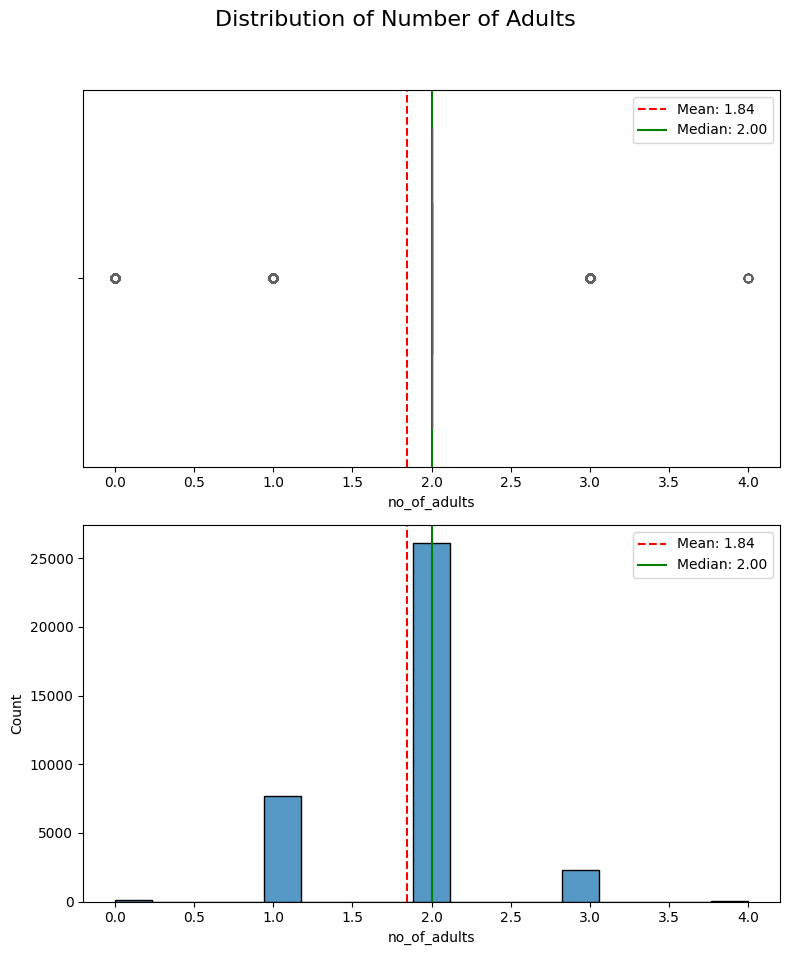

In [ ]:
plot_box_hist(df, 'no_of_adults', 'Number of Adults')

-

- Most bookings have 2 adults.
- A small percentage of bookings do not have have adults listed. We will explore this in the multivariate analysis.
- Outliers exist here as expected.

####**Observations on Number of Children**

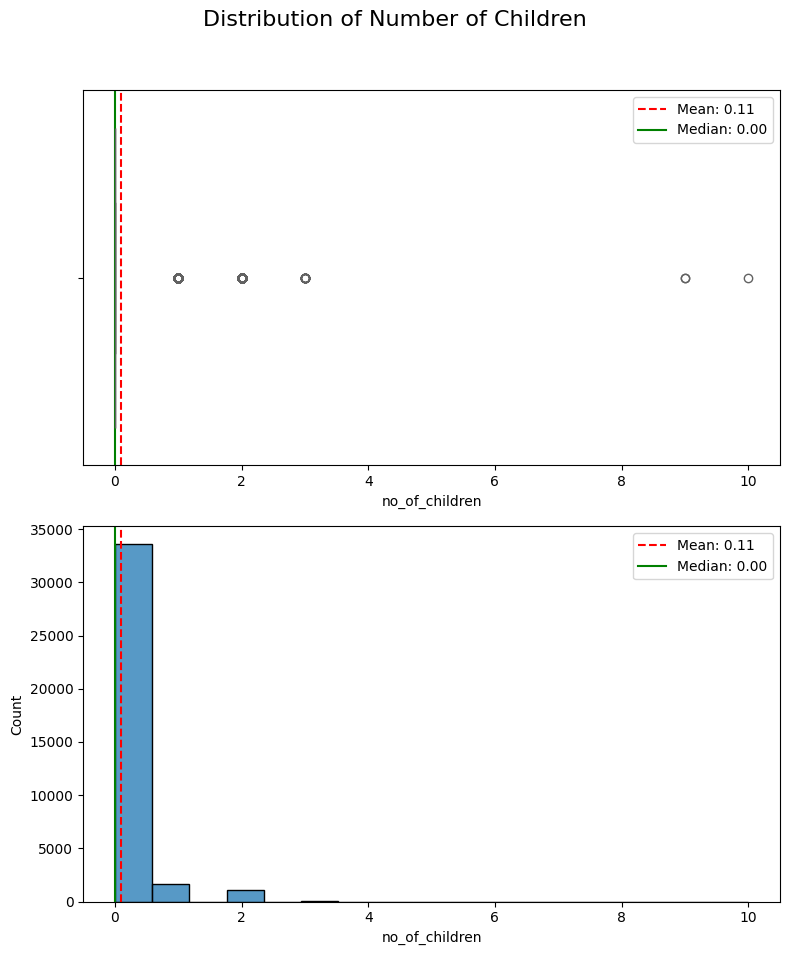

In [ ]:
plot_box_hist(df, 'no_of_children', 'Number of Children')

- Most bookings do not include children.
-Outliers also exist here, which is normal.

####**Observations on Number of Weekend Nights**

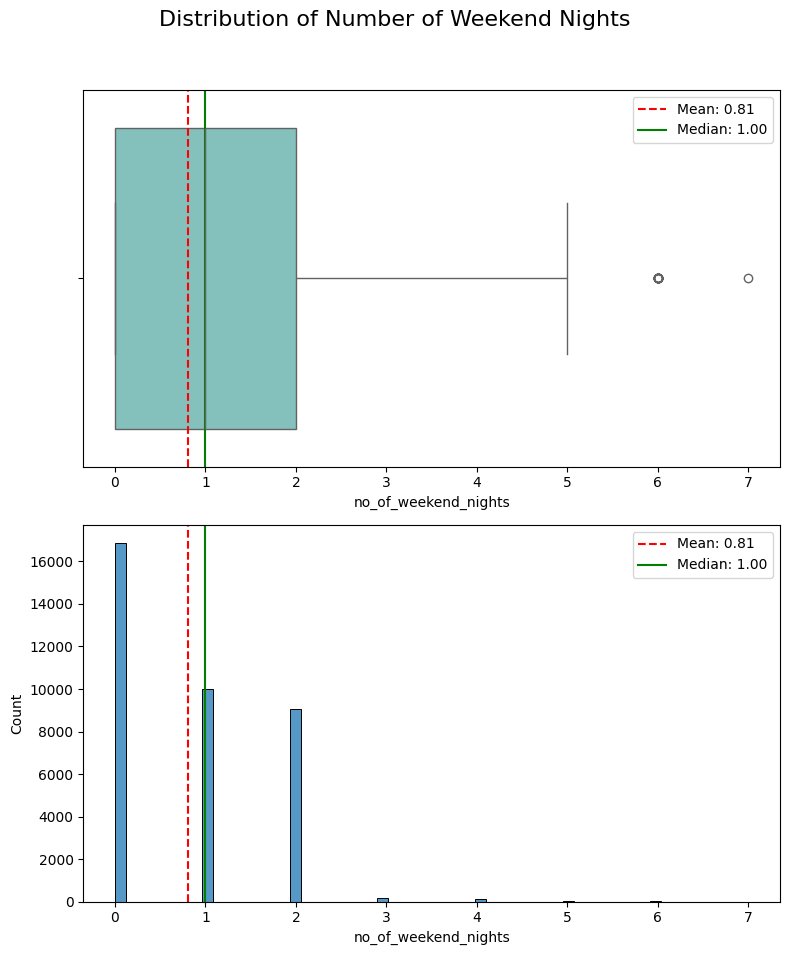

In [ ]:
plot_box_hist(df, 'no_of_weekend_nights', 'Number of Weekend Nights')

In [ ]:
#calculate percentage of bookings that include 6 or more weekend nights
extended_stay = df[df['no_of_weekend_nights'] >=6]
ratio_weekend_nights_gt_eq_6 = extended_stay.shape[0] / df.shape[0]
print('Percentage of bookings with 6 or more weekend nights: ', f'{ratio_weekend_nights_gt_eq_6 * 100 :.3f} %')

Percentage of bookings with 6 or more weekend nights:  0.058 %


In [ ]:
#Check booking status of stays that include 6 or more weekend nights
print('Out of bookings that include >= 6 weekend nights:')
print('Count:\n', extended_stay['booking_status'].value_counts())
print('-' * 30)
print('Percentage:\n', extended_stay['booking_status'].value_counts(normalize=True))

Out of bookings that include >= 6 weekend nights:
Count:
 booking_status
Canceled        17
Not_Canceled     4
Name: count, dtype: int64
------------------------------
Percentage:
 booking_status
Canceled       0.80952
Not_Canceled   0.19048
Name: proportion, dtype: float64


- 75% of the bookings are what can be considered as shorter stays, including 0 - 2 weekend nights.
- 25% of the bookings can be what we consider extended stays, which include 3-5 weekend nights.
- We have some outliers here as well with the max being 7 weekend nights booked.
- Less than 1% of bookings include 6 or more weekend nights. 80% of such bookings are cancelled. This will be further explored in the Multivariate Analysis section.

####**Observations on Number of Week Nights**

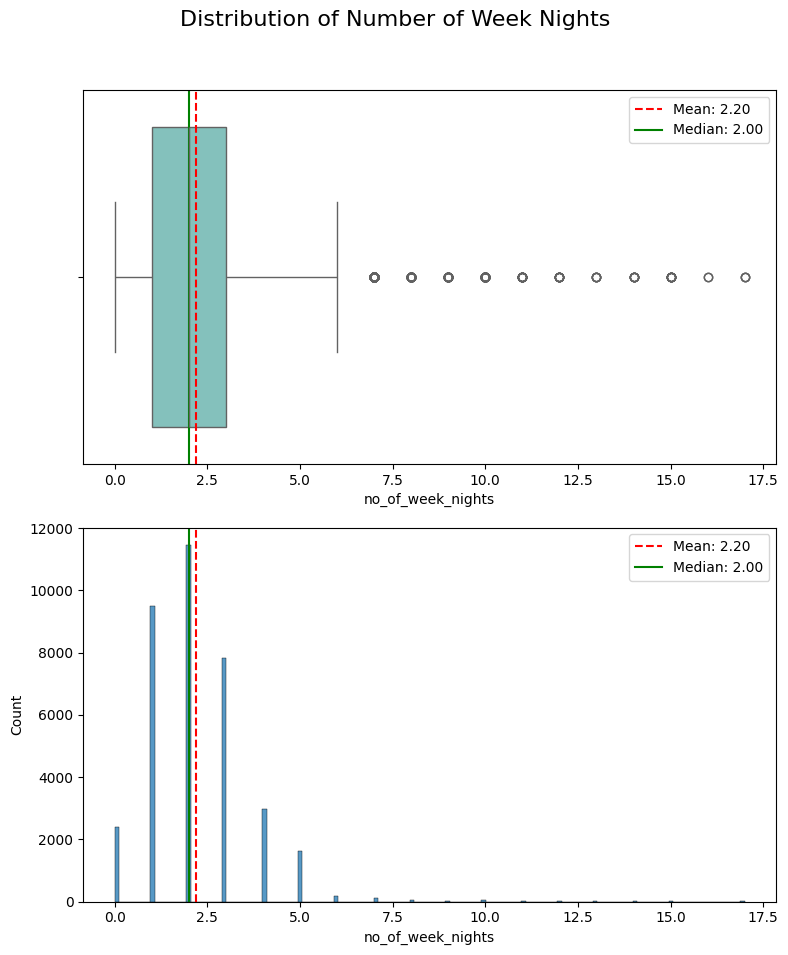

In [ ]:
plot_box_hist(df, 'no_of_week_nights', 'Number of Week Nights')

- 75% of the bookings include 0 - 3 week nights.
- Outliers exist here as well, which is not unusual.

####**Observations on Required Car Parking Space**

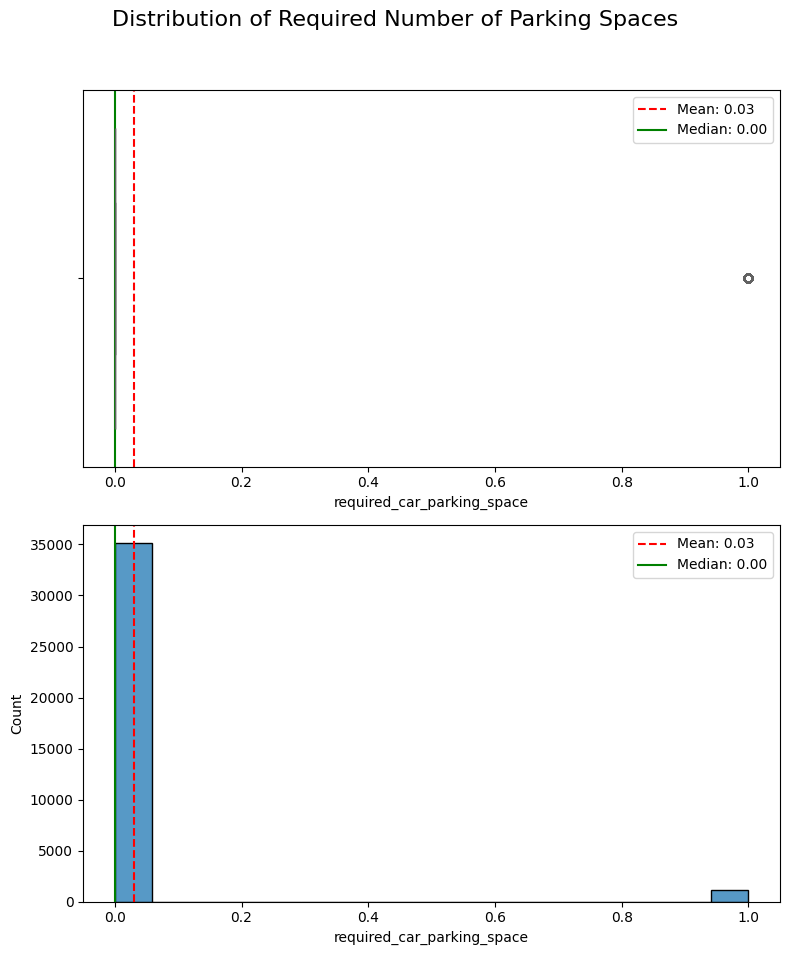

In [ ]:
plot_box_hist(df, 'required_car_parking_space', 'Required Number of Parking Spaces')

- Most bookings do not require car parking spaces. In few instances, only one will be requested.

####**Observations on Lead Time**

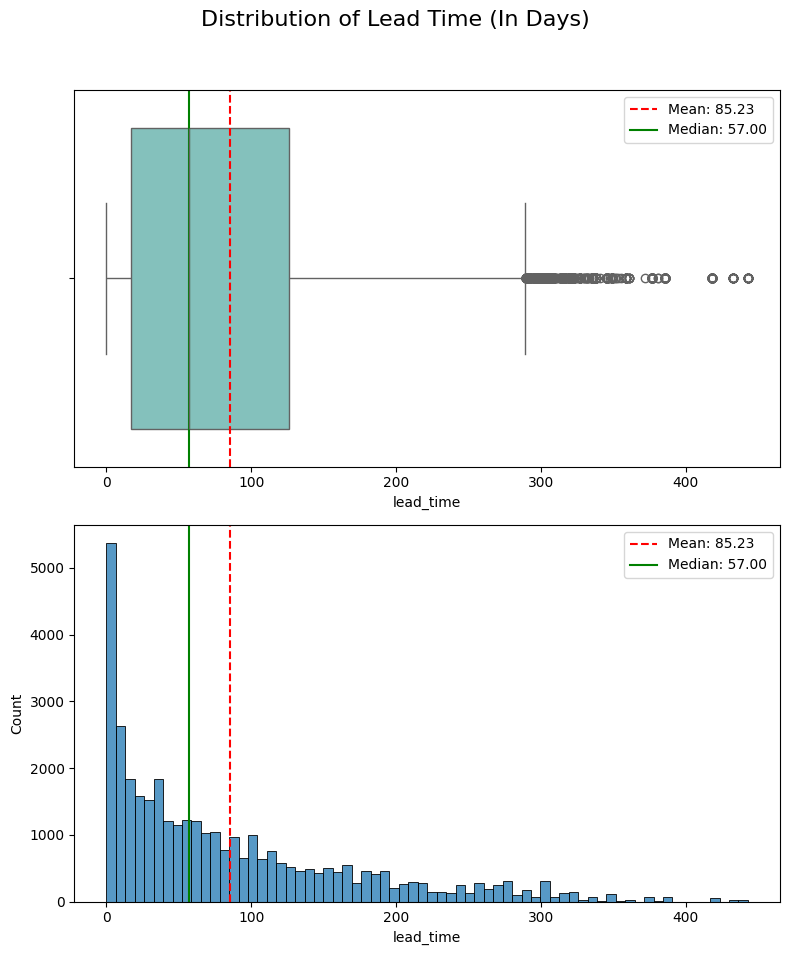

In [ ]:
plot_box_hist(df, 'lead_time', 'Lead Time (In Days)')

- 50% of the bookings have a lead time of between 0 - 57 days.
- The other 50% of the bookings have a lead time between 58 - 290 days.
- Outliers exist here, which is not unusual.


####**Observations on Arrival Date**

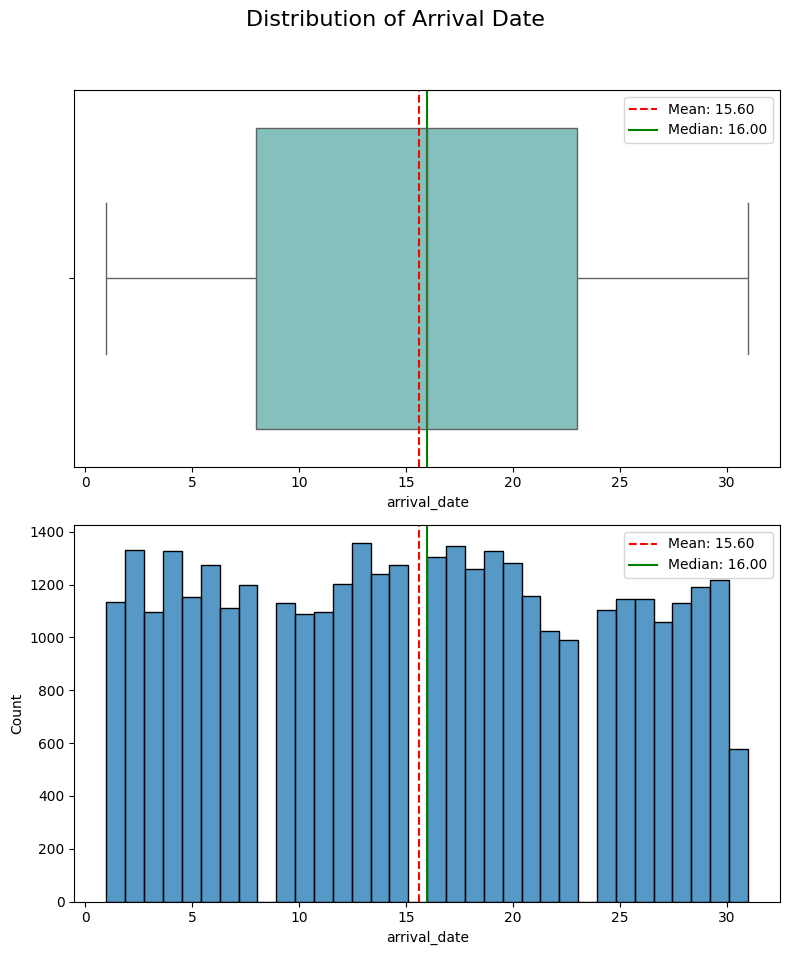

In [ ]:
plot_box_hist(df, 'arrival_date', 'Arrival Date')

- There is a uniform distribution across the dates of arrival.

####**Observations on Number of Previous Cancellations**

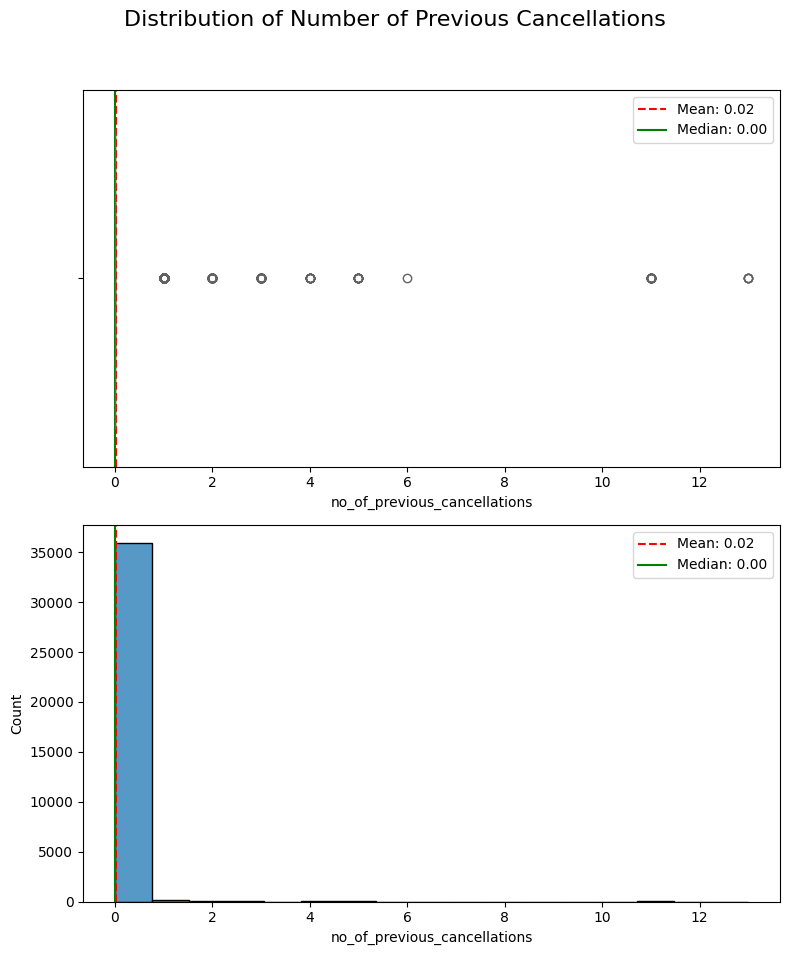

In [ ]:
plot_box_hist(df, 'no_of_previous_cancellations', 'Number of Previous Cancellations')

In [ ]:
#generate percentages and counts of number of previous cancellations
print('Count:\n', df['no_of_previous_cancellations'].value_counts())
print('-' * 50)
print('Percentage:\n', df['no_of_previous_cancellations'].value_counts(normalize=True))

Count:
 no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64
--------------------------------------------------
Percentage:
 no_of_previous_cancellations
0    0.99068
1    0.00546
2    0.00127
3    0.00119
11   0.00069
5    0.00030
4    0.00028
13   0.00011
6    0.00003
Name: proportion, dtype: float64


- 99% of the bookings had 0 previous cancellations.
- 4 bookings had 13 previous cancellations.

####**Observations on Previous Bookings Not Canceled**

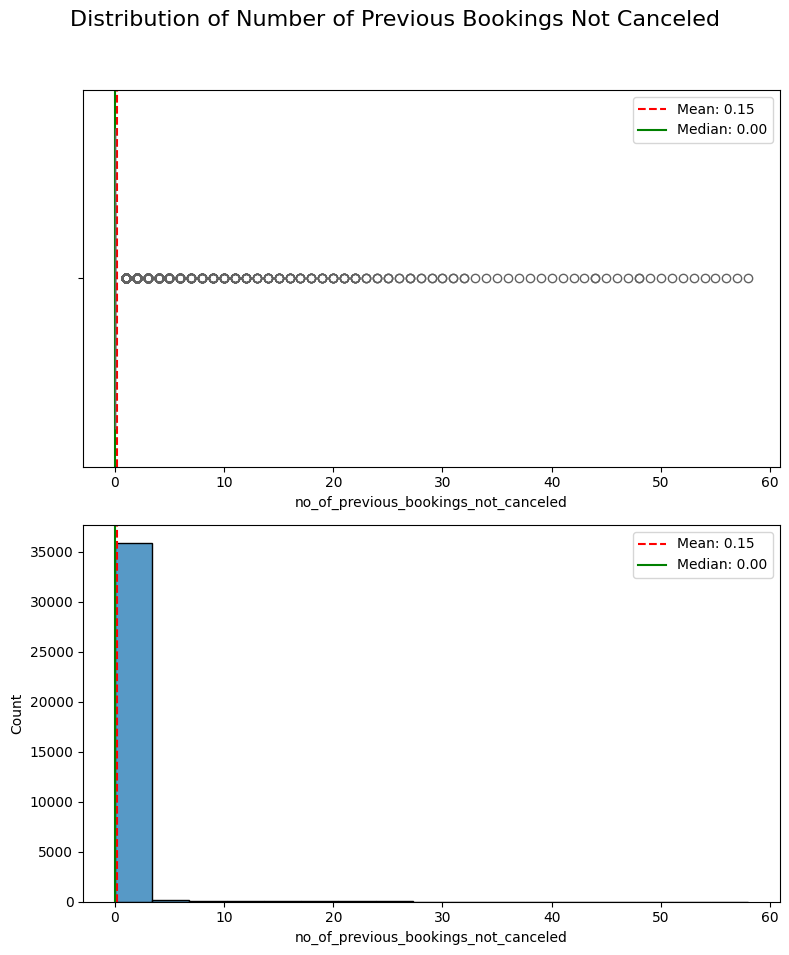

In [ ]:
plot_box_hist(df, 'no_of_previous_bookings_not_canceled', 'Number of Previous Bookings Not Canceled')

- Most bookings had 0 previous uncanceled bookings. This may be because most bookings were made by first-time guests.
- Outliers exist here, which are not unusual.

####**Observations on Average Price Per Room**

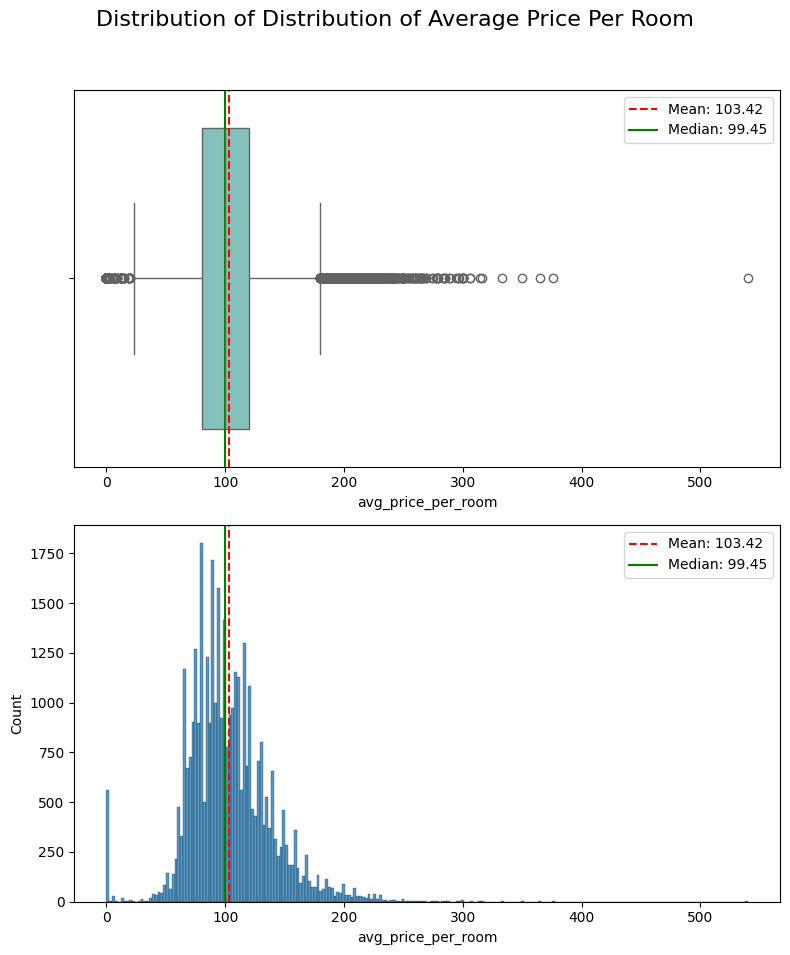

In [ ]:
plot_box_hist(df, 'avg_price_per_room', 'Distribution of Average Price Per Room')

In [ ]:
Q3 = df['avg_price_per_room'].quantile(.75)
Q1 = df['avg_price_per_room'].quantile(.25)

IQR = Q3 - Q1

lower_whisker = Q1 - IQR * 1.5
upper_whisker = Q3 + IQR * 1.5

print('Lower whisker = ',lower_whisker)
print('Upper whisker = ', upper_whisker)

Lower whisker =  20.749999999999993
Upper whisker =  179.55


In [ ]:
#find max of avg_price_per_room
df['avg_price_per_room'].max()

540.0

In [ ]:
#calculate how many entries have average price of 0
zero_price = df[df['avg_price_per_room']==0]
zero_price

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
63      INN00064             1               0                     0   
145     INN00146             1               0                     0   
209     INN00210             1               0                     0   
266     INN00267             1               0                     0   
267     INN00268             1               0                     2   
...          ...           ...             ...                   ...   
35983   INN35984             1               0                     0   
36080   INN36081             1               0                     1   
36114   INN36115             1               0                     0   
36217   INN36218             2               0                     2   
36250   INN36251             1               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
63                     1       Meal Plan 1                           0   
145                    2       Meal Plan 1                           0   
209                    0       Meal Plan 1                           0   
266                    2       Meal Plan 1                           0   
267                    1       Meal Plan 1                           0   
...                  ...               ...                         ...   
35983                  1       Meal Plan 1                           0   
36080                  1       Meal Plan 1                           0   
36114                  1       Meal Plan 1                           0   
36217                  1       Meal Plan 1                           0   
36250                  2       Meal Plan 2                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
63           Room_Type 1          2          2017              9   
145          Room_Type 1         13          2018              6   
209          Room_Type 1          4          2018              2   
266          Room_Type 1          1          2017              8   
267          Room_Type 1          4          2017              8   
...                  ...        ...           ...            ...   
35983        Room_Type 7          0          2018              6   
36080        Room_Type 7          0          2018              3   
36114        Room_Type 1          1          2018              3   
36217        Room_Type 2          3          2017              8   
36250        Room_Type 1          6          2017             12   

       arrival_date market_segment_type  repeated_guest  \
63               10       Complementary               0   
145               1       Complementary               1   
209              27       Complementary               0   
266              12       Complementary               1   
267              23       Complementary               0   
...             ...                 ...             ...   
35983             7       Complementary               1   
36080            21       Complementary               1   
36114             2              Online               0   
36217             9              Online               0   
36250            10              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
63                                0                                     0   
145                               3                                     5   
209                               0                                     0   
266                               0                                     1   
267                               0                                     0   
...                             ...                                   ...   
35983                             4                                    17   
36080                             3                                    15   
36114                            

In [ ]:
#percentage of bookings that have avg_price_per_room = 0
ratio_of_zero_price = zero_price.shape[0] / df.shape[0]
print('Percentage of zero priced rooms: ' f'{ratio_of_zero_price * 100 :.3f}%')

Percentage of zero priced rooms: 1.502%


In [ ]:
#check market segment type of zero priced rooms
print('Market segment type for zero priced rooms:\n', zero_price['market_segment_type'].value_counts(normalize=True))

Market segment type for zero priced rooms:
 market_segment_type
Complementary   0.64954
Online          0.35046
Name: proportion, dtype: float64


- Most of the bookings have an average price per room ranging between 0 - 179 euros, since the data is right skewed.
- 1.5% of all bookings have an average price per room of 0 euros. About 65% of these bookings are of the market segment type "Complementary" and 35% are of the type "Online,"
- Many outliers exist here with the max price set at 540 euros.

####**Observations on Number of Special Requests**

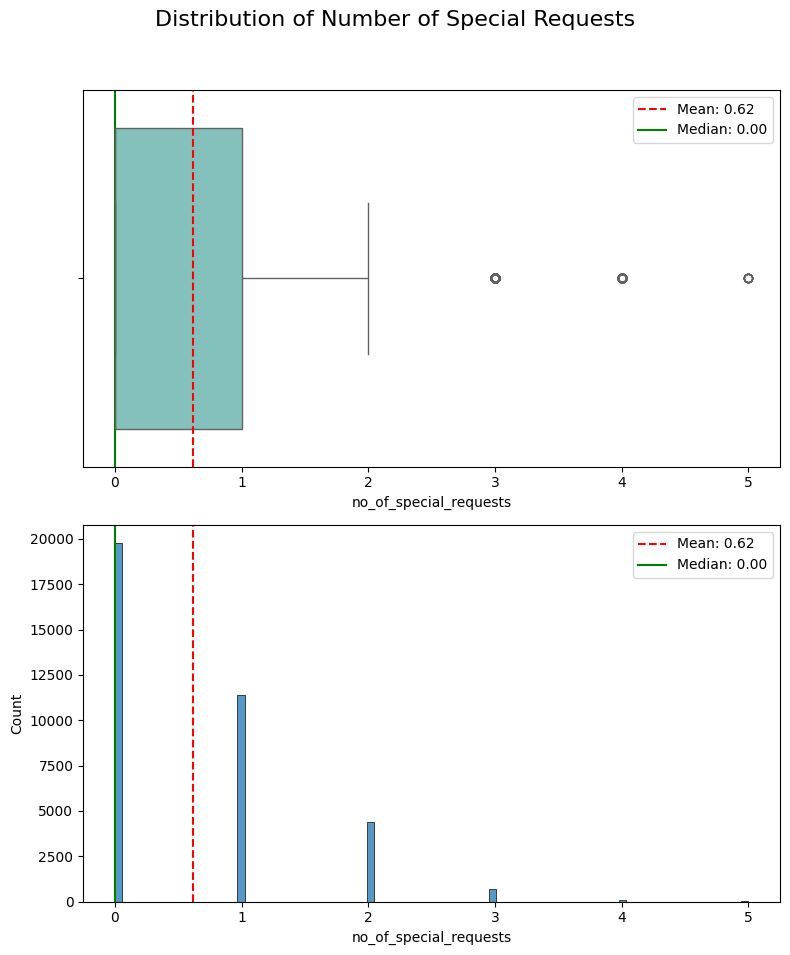

In [ ]:
plot_box_hist(df, 'no_of_special_requests', 'Number of Special Requests')

- 50% of the bookings have 0 special requests.
- 75% of all bookings have 1 or less special requests.
- Outliers exist here which is not unusual.

###**Now we will explore categorical predictors.**
- We will create a user defined function that will generate a countplot with parameters: df and predictor.

In [ ]:
#create a user defined function that will generate a countplot for categorical data
def count_plot(df, predictor, title):

  #set plot size
  plt.figure(figsize=(7,5))

  #create the count plot
  ax = sns.countplot(data=df, x=predictor, palette='Paired', order=df[predictor].value_counts(ascending=False).index)

  #add title
  plt.title(title, fontsize=16)

  #label axes
  plt.xlabel(predictor, fontsize=14)
  plt.ylabel('Count', fontsize=14)

  #rotate x-axis labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

  #calculate percentage and annotate
  total = len(df)
  for p in ax.patches:
    count = p.get_height()
    percentage = f'{(count / total) * 100:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = count
    ax.annotate(percentage, (x,y), ha='center', va='bottom')

  plt.show()

####**Observations on Type of Meal Plan**

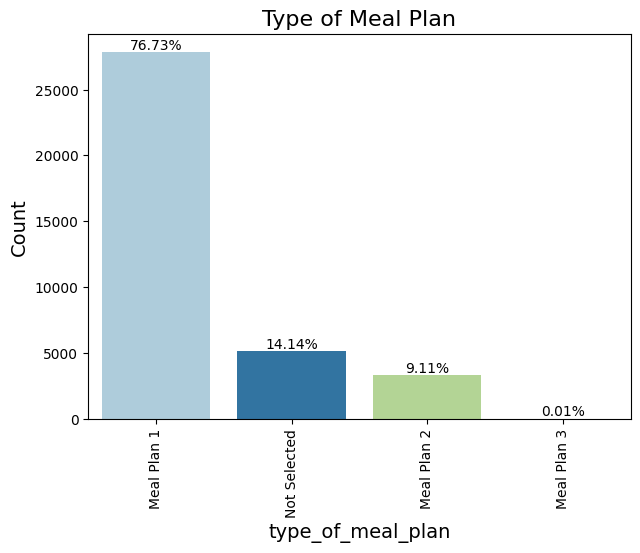

In [ ]:
count_plot(df,'type_of_meal_plan', 'Type of Meal Plan')

- Meal Plan 1 is most commonly selected, occupying 77% of all selections.
- Meal Plan 3 is selected the least, occupying less than 1% of all selections.
- 14% of the bookings did not include a meal plan.

####**Observations on Room Type Reserved**

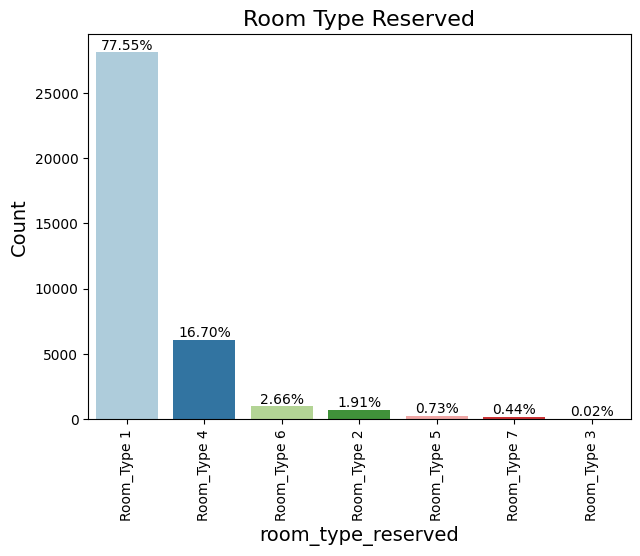

In [ ]:
count_plot(df,'room_type_reserved', 'Room Type Reserved')

- Room Type 1 occupies 78% of all selections, followed by Room Type 4 which occupies 17%.
- Room Type 3 is the least common room type occupying less than 1% of all selections.

####**Observations on Arrival Year**

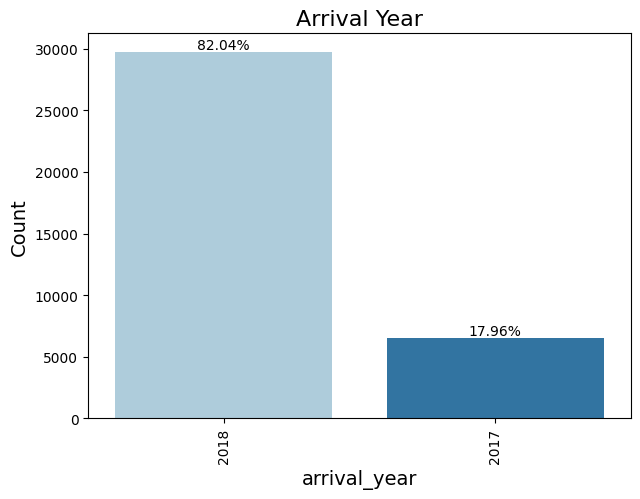

In [ ]:
count_plot(df,'arrival_year', 'Arrival Year')

- 82% of the bookings had an arrival year of 2018, while 18% had an arrival year of 2017.

####**Observations on Arrival Month**

**What are the busiest months in the hotel? (Question 1)**

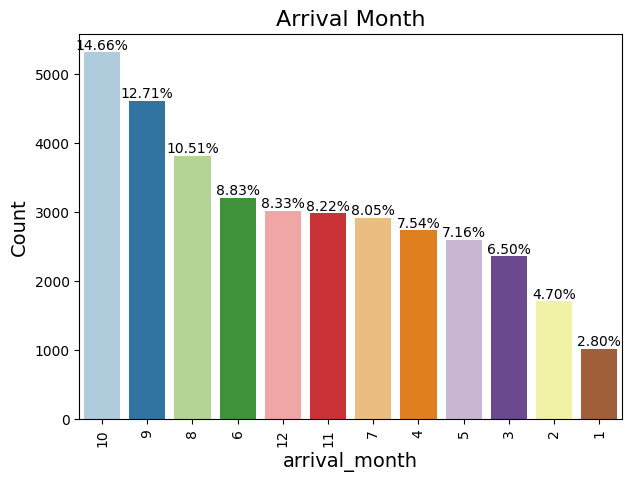

In [ ]:
count_plot(df,'arrival_month', 'Arrival Month')

- The busiest months are October, September and August respectively. **(Question 1)**
- Although they are not as busy, June-July, November-December and April come in as the second group of busiest months and all have similar frequencies.
- The least busy month is January.

####**Observations on Market Segment Type**

**Which market segment do most of the guests come from (Question 2)**

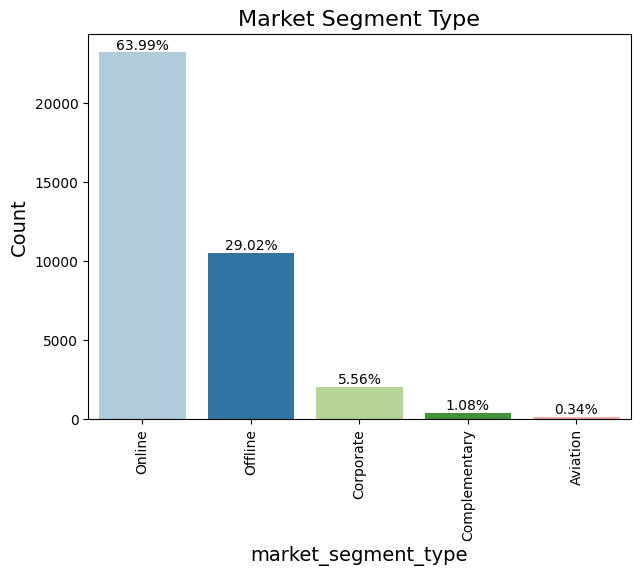

In [ ]:
count_plot(df,'market_segment_type', 'Market Segment Type')

- Most guests come from the online market segment, making up 64% of all bookings **(Question 2)**.
- 29% of the guests come from the offline market segment.

####**Observations on Repeated Guest**

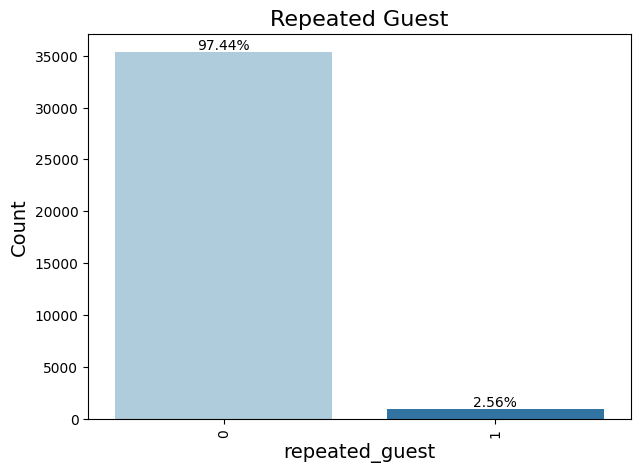

In [ ]:
count_plot(df,'repeated_guest', 'Repeated Guest')

- Only 3% of the bookings were made by repeated guests.

####**Observations on Booking Status**

**What percentage of bookings are canceled? (Question 4)**

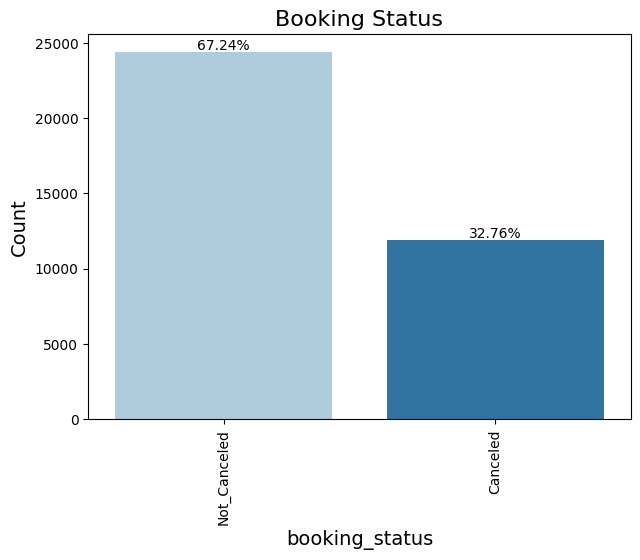

In [ ]:
count_plot(df,'booking_status', 'Booking Status')

- 33% of the bookings were canceled. **(Question 4)**

####**Observations on Booking ID**

In [ ]:
df['Booking_ID'].unique()

array(['INN00001', 'INN00002', 'INN00003', ..., 'INN36273', 'INN36274',
       'INN36275'], dtype=object)

In [ ]:
df['Booking_ID'].nunique()

36275

- All booking IDs are unique and incremental, as expected.

##**Multivariate Analysis**

####**We will use the following functions to perform multivariate analysis.**

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )

    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=['#ff7f0e','#1f77b4'])
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="colorblind")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="colorblind",
    )

    plt.tight_layout()
    plt.show()

####**We will explore linear relationships between variables, if any.**

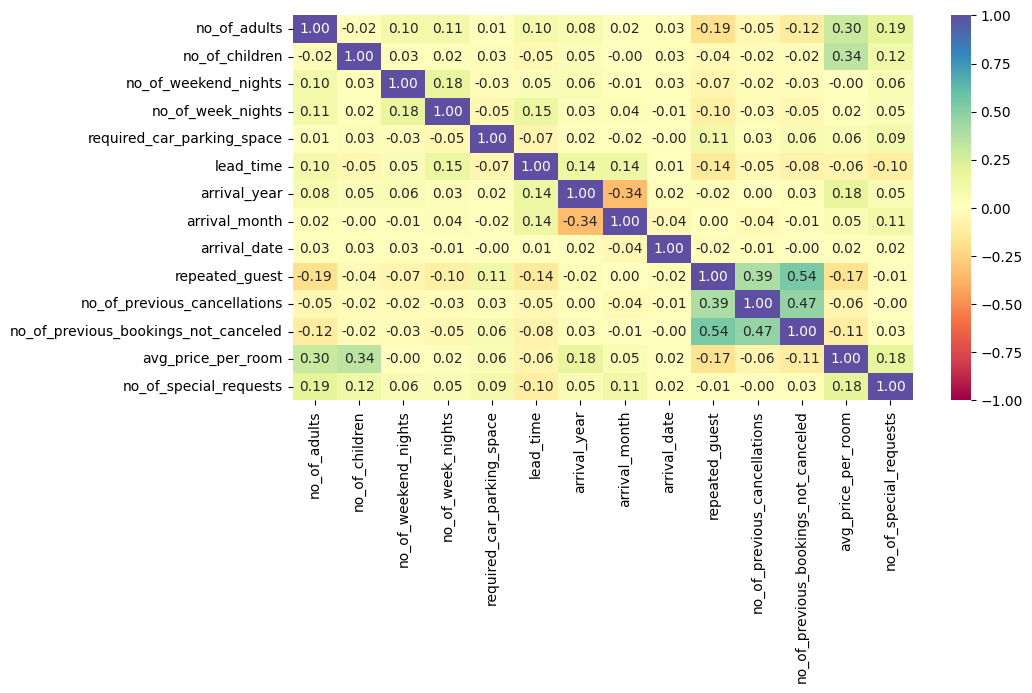

In [ ]:
#create a heatmap to display correlation coefficients of variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='Spectral')
plt.show()

- There are weak positive linear relationships seen between the following variables:
  - Repeated guest and number of previous bookings **not** canceled (0.54).
  - Number of previous cancellations and number of previous bookings **not** canceled (0.47).
  - Repeated guest and number of previous cancellations (0.39)
- There is a weak negative linear relationship between arrival year and arrival month (-0.34).
- No other significant correlations are detected at this point.

####**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments? (Question 3)**

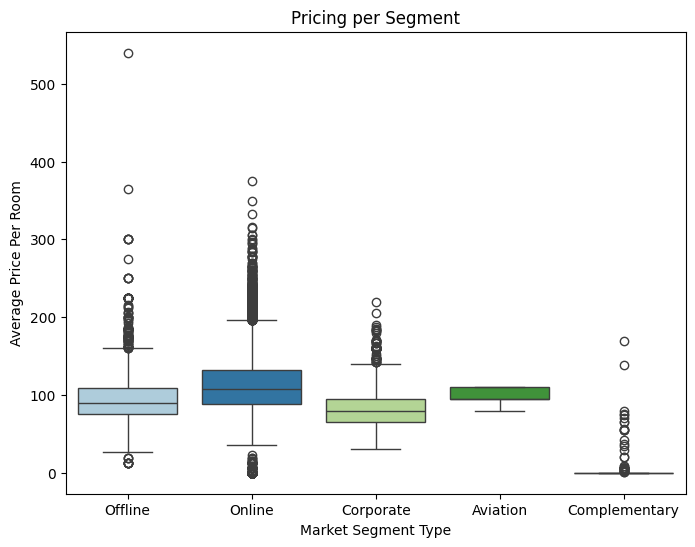

In [ ]:
#generate a boxplot displaying pricing for each market segment
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='market_segment_type', y= 'avg_price_per_room', palette='Paired')
plt.title('Pricing per Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price Per Room')
plt.show()

- The online market segment has the highest median price and also contains the largest range of prices among all market segments.
- The aviation market segment has the second highest median price, followed by the offline segment, the corporate segment and the complimentary segment.

####**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel? (Question 5)**

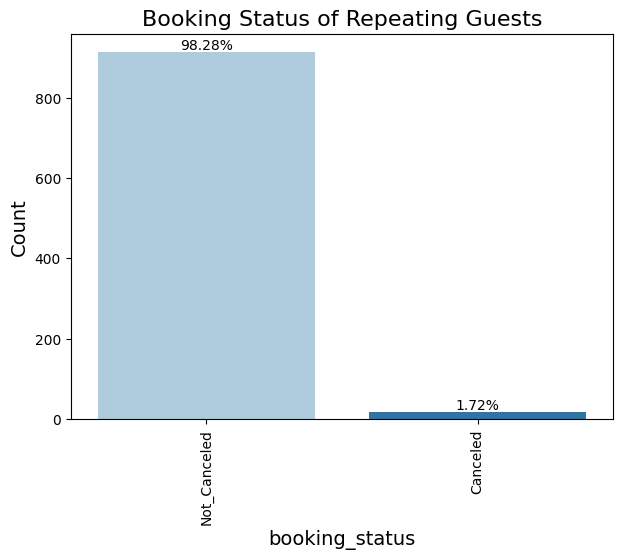

In [ ]:
#pull bookings made by repeating guests
repeating_guests = df[df['repeated_guest'] == 1]

#generate a bar plot displaying cancellation proportions made by repeating guests
count_plot(repeating_guests, 'booking_status', 'Booking Status of Repeating Guests')

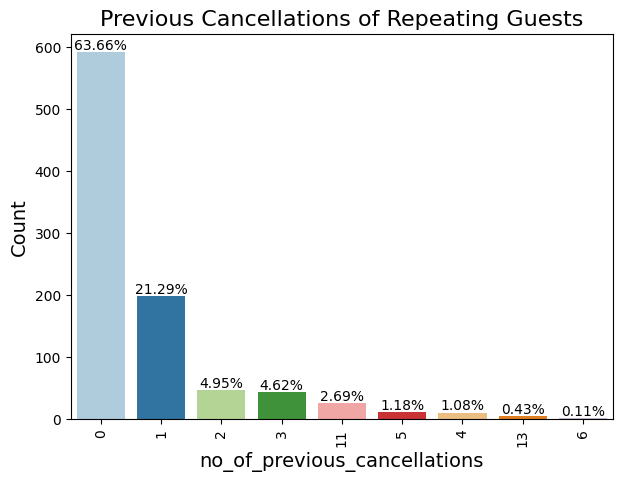

In [ ]:
#repeated guests who have canceled in the past
count_plot(repeating_guests, 'no_of_previous_cancellations', 'Previous Cancellations of Repeating Guests')

- 1.72% of repeating guests canceled their current booking.
- 64% of repeating guests have no previous cancellations.
- 15% of repeating guests have previously canceled 2 or more times.
- 36% of repeating guests have previously canceled at least once.

###**Comparison of all predictors with respect to the target variable.**

####**`no_of_special_requests vs booking_status`**

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation? (Question 6)**

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


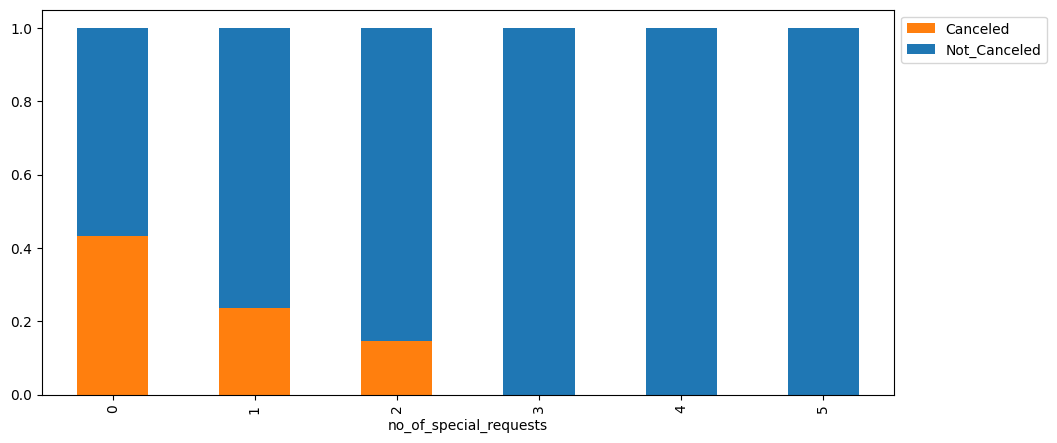

In [ ]:
#visualize special requirements with current booking status
stacked_barplot(df, 'no_of_special_requests', 'booking_status')

- The data demonstrates that bookings that had more requests were less likely to get canceled. **(Q6)**

####**`no_of_adults vs booking_status`**

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


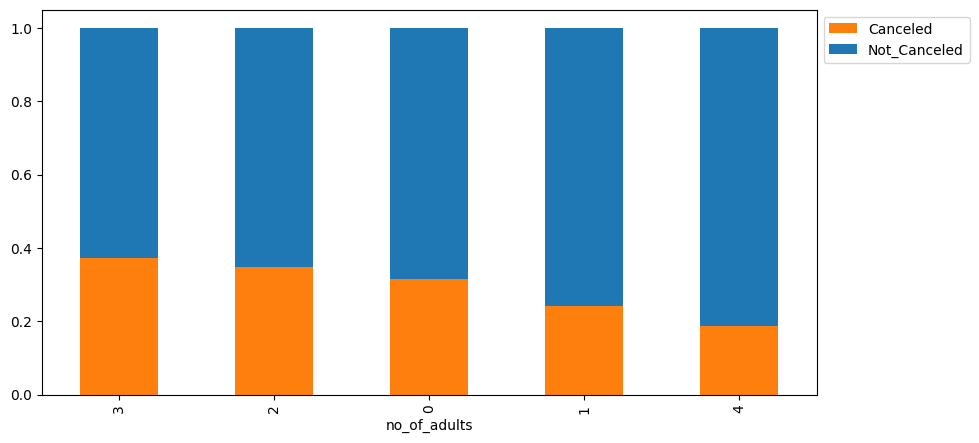

In [ ]:
stacked_barplot(df, 'no_of_adults', 'booking_status')

In [ ]:
#filter bookings that have 0 adults
no_adults = df[df['no_of_adults']==0]

#calculate percentage of bookings with no adults
print(f'Percentage of bookings with no adults: {no_adults.shape[0] / df.shape[0]: .3f}%')

Percentage of bookings with no adults:  0.004%


In [ ]:
#view cancellations for bookings with no adults
print('For Bookings with No Adults:')
print(no_adults['booking_status'].value_counts())
print('-' * 30)
print(no_adults['booking_status'].value_counts(normalize=True))

For Bookings with No Adults:
booking_status
Not_Canceled    95
Canceled        44
Name: count, dtype: int64
------------------------------
booking_status
Not_Canceled   0.68345
Canceled       0.31655
Name: proportion, dtype: float64


- Bookings that include 2 adults make up 72% of the data, followed by bookings with 1 adult at 21%. The third largest group of bookings were those that included 3 adults, occupying 6% of the data,
  - These groups showed that as the number of included adults decreased, the proportion of cancellations also decreased.
- 139 bookings have no adults. This makes up less than 1% of all bookings. 31% of bookings without adults are canceled.

####**`no_of_children vs booking_status`**

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


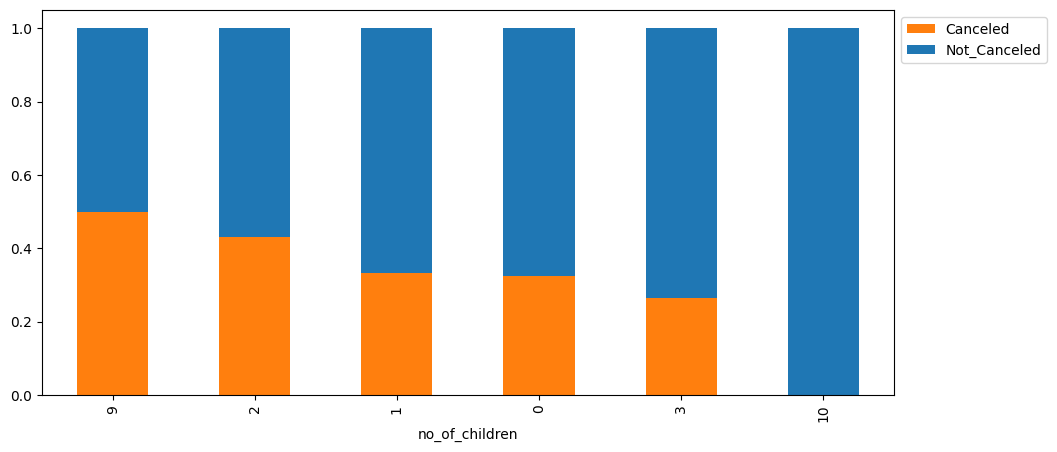

In [ ]:
stacked_barplot(df, 'no_of_children', 'booking_status')

- Most bookings include 0, 1 and 2 children respectively. For these groups, the data demonstrates that as the number of included children decreased, the proportion of  cancellations also decreased.

####**`no_of_weekend_nights vs booking_status`**

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


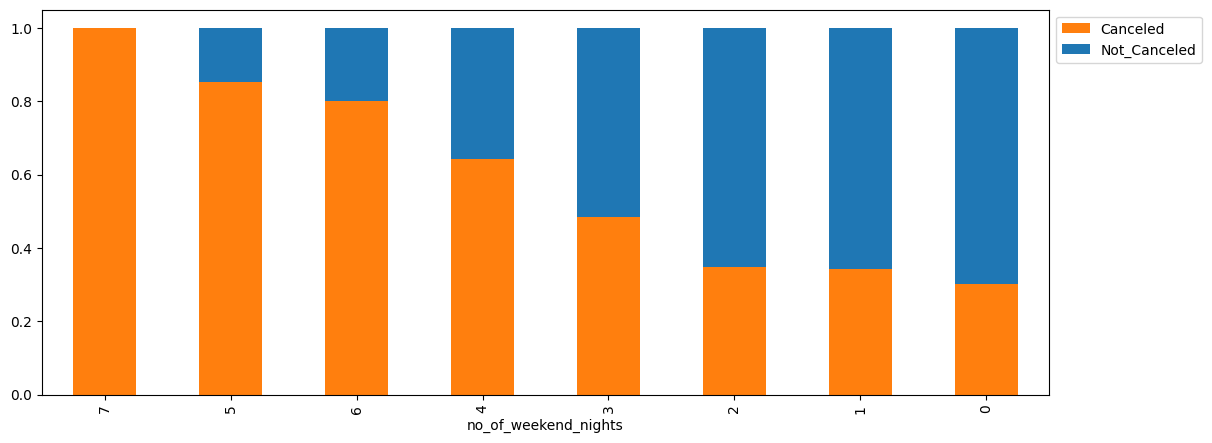

In [ ]:
stacked_barplot(df, 'no_of_weekend_nights', 'booking_status')

- Bookings that include 0-2 weekend nights are most common. There seems to be no significant patterns of cancellation proportion among these groups.
- Bookings that include higher numbers of weekend nights had higher proportions of cancellations.

####**`no_of_week_nights vs booking_status`**

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

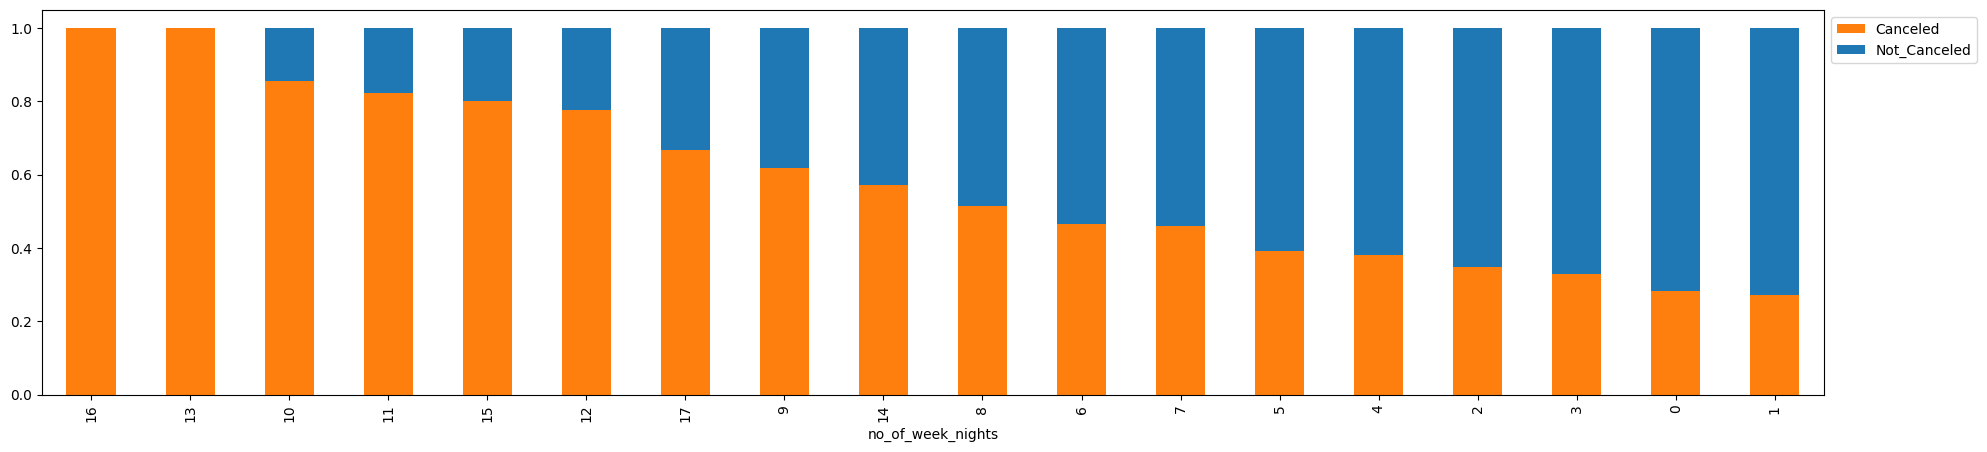

In [ ]:
stacked_barplot(df, 'no_of_week_nights', 'booking_status')

- Bookings that included more weeknights tended to have higher proportions of cancellations.

####**`type_of_meal_plan vs booking_status`**

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


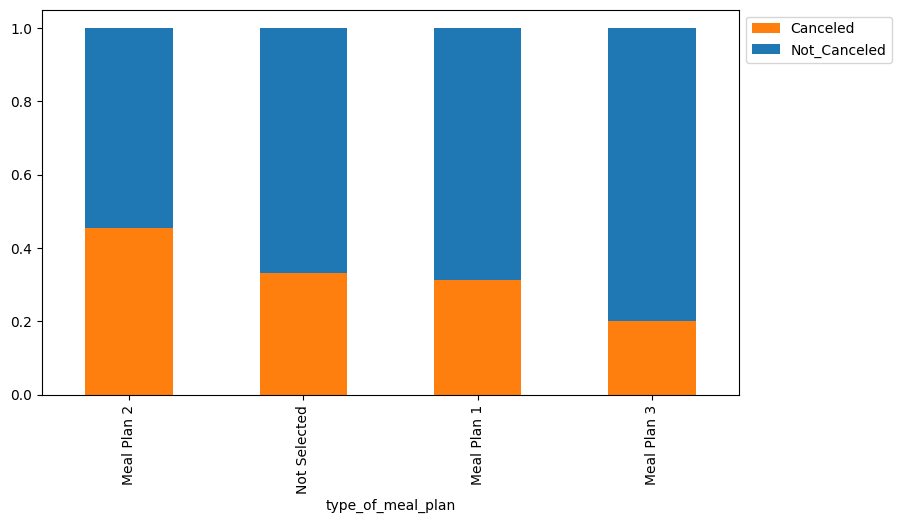

In [ ]:
stacked_barplot(df, 'type_of_meal_plan', 'booking_status')

- About 45% of guests who chose meal plan 2 canceled.

####**`required_car_parking_space vs booking_status`**

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


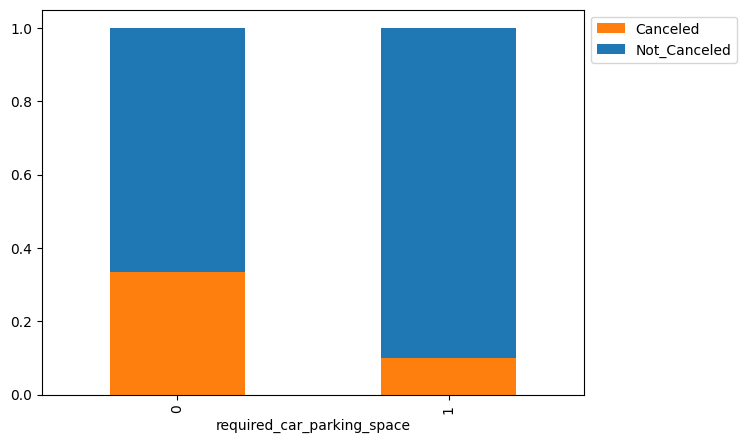

In [ ]:
stacked_barplot(df, 'required_car_parking_space', 'booking_status')

- 97% of guests did not require a parking space. Of these guests, about 35% canceled their stay.
- Only 3% of guests required a parking space. Of these guests,about 10% canceled their stay.

####**`room_type_reserved vs booking_status`**

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


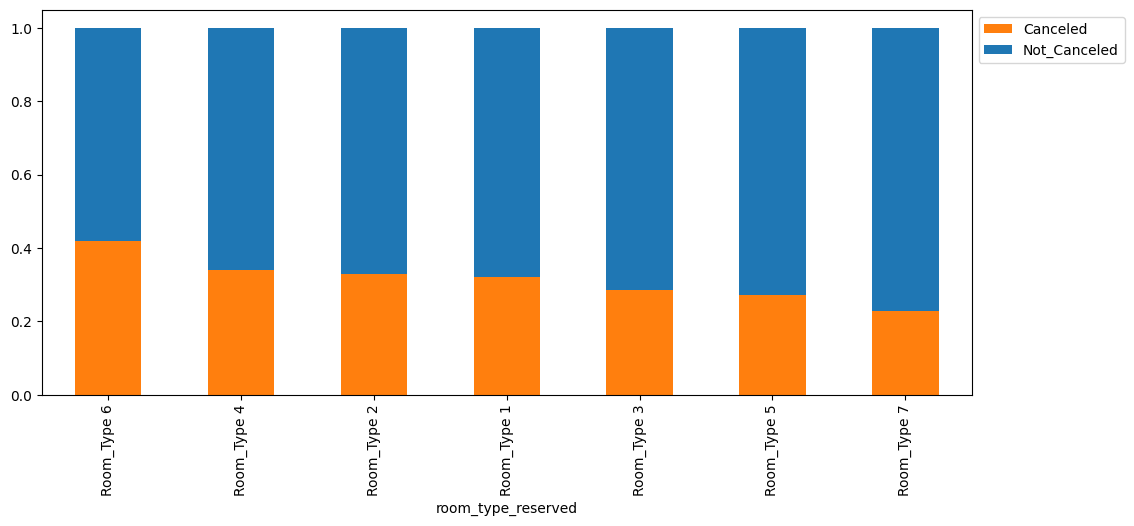

In [ ]:
stacked_barplot(df, 'room_type_reserved', 'booking_status')

- Room types 1, 4 and 6 are the most popular respectively. Of these groups, Room Type 6 had the largest proportion of cancellations and Room Type 1 had the smallest proportion of cancellations.


####**`lead_time vs booking_status`**

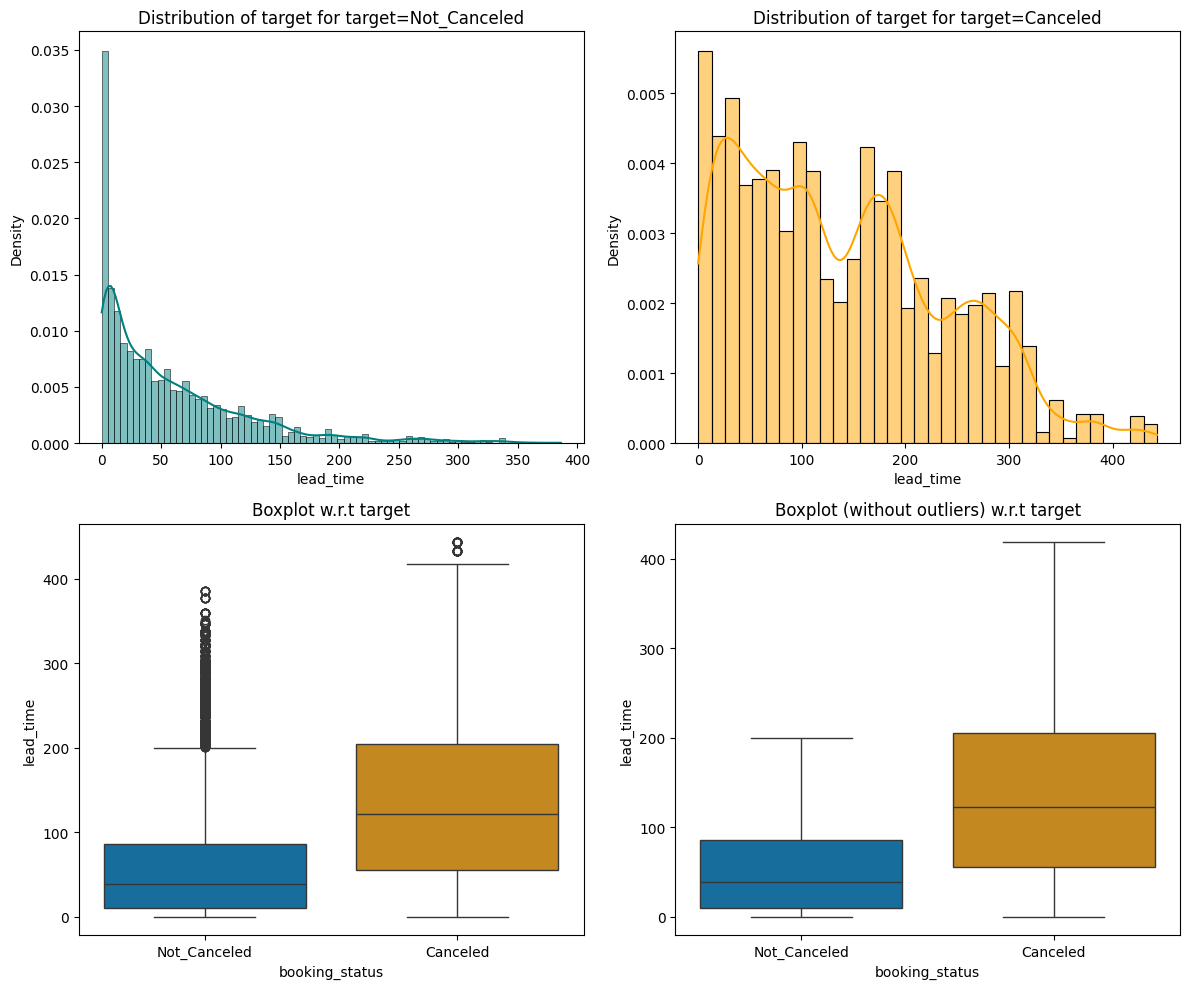

In [ ]:
distribution_plot_wrt_target(df, 'lead_time', 'booking_status')

- Cancellations tend to happen more if the booking is made too far in advance. The data shows that bookings made over 200 days in advance are more likely to get canceled.

####**`arrival_year vs booking_status`**

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


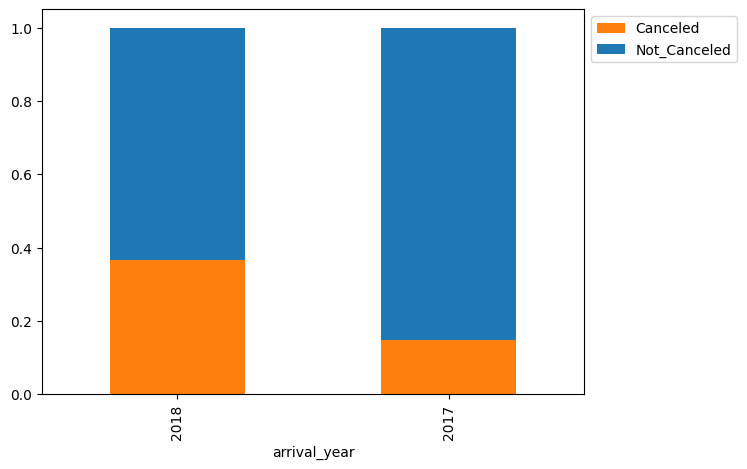

In [ ]:
stacked_barplot(df, 'arrival_year', 'booking_status')

- 82% of the bookings were made for the arrival year 2018. Of these bookings, about 38% were canceled.
- Bookings for the arrival year 2017 make up 18%. Of these bookngs, about 17% canceled.

####**`arrival_month vs booking_status`**

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


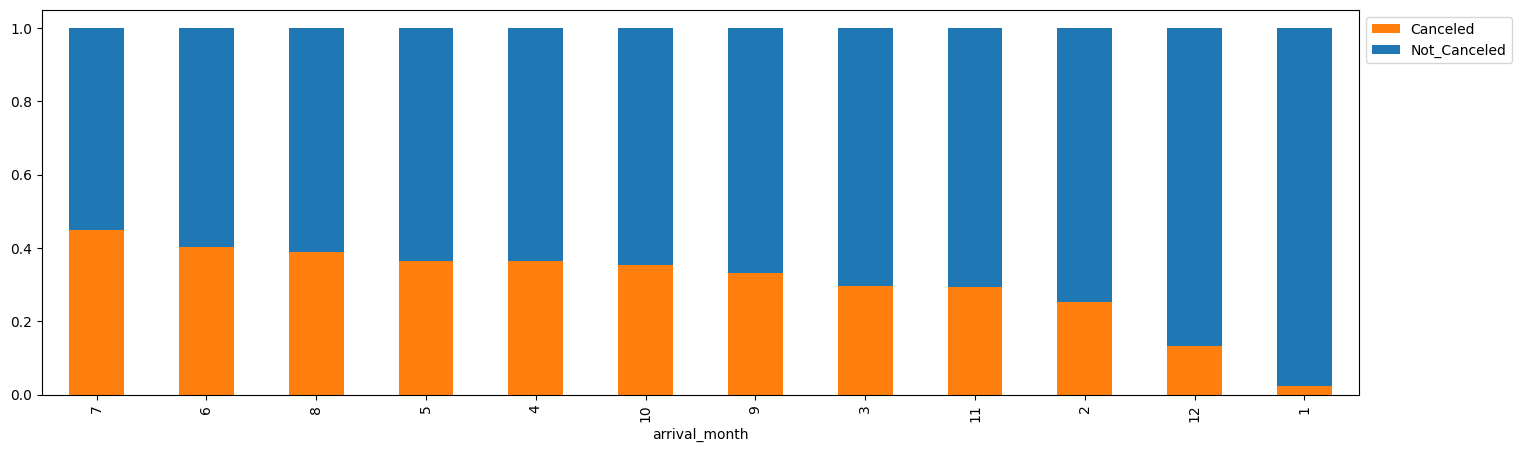

In [ ]:
stacked_barplot(df, 'arrival_month', 'booking_status')

- Bookings for the arrival month of July had the highest cancellation rate. Bookings for this month make up about 8% of the data.
- December and January had the lowest proportions of cancellations out of all months. However, these months only make up 11% of the bookings.

####**`arrival_date vs booking_status`**

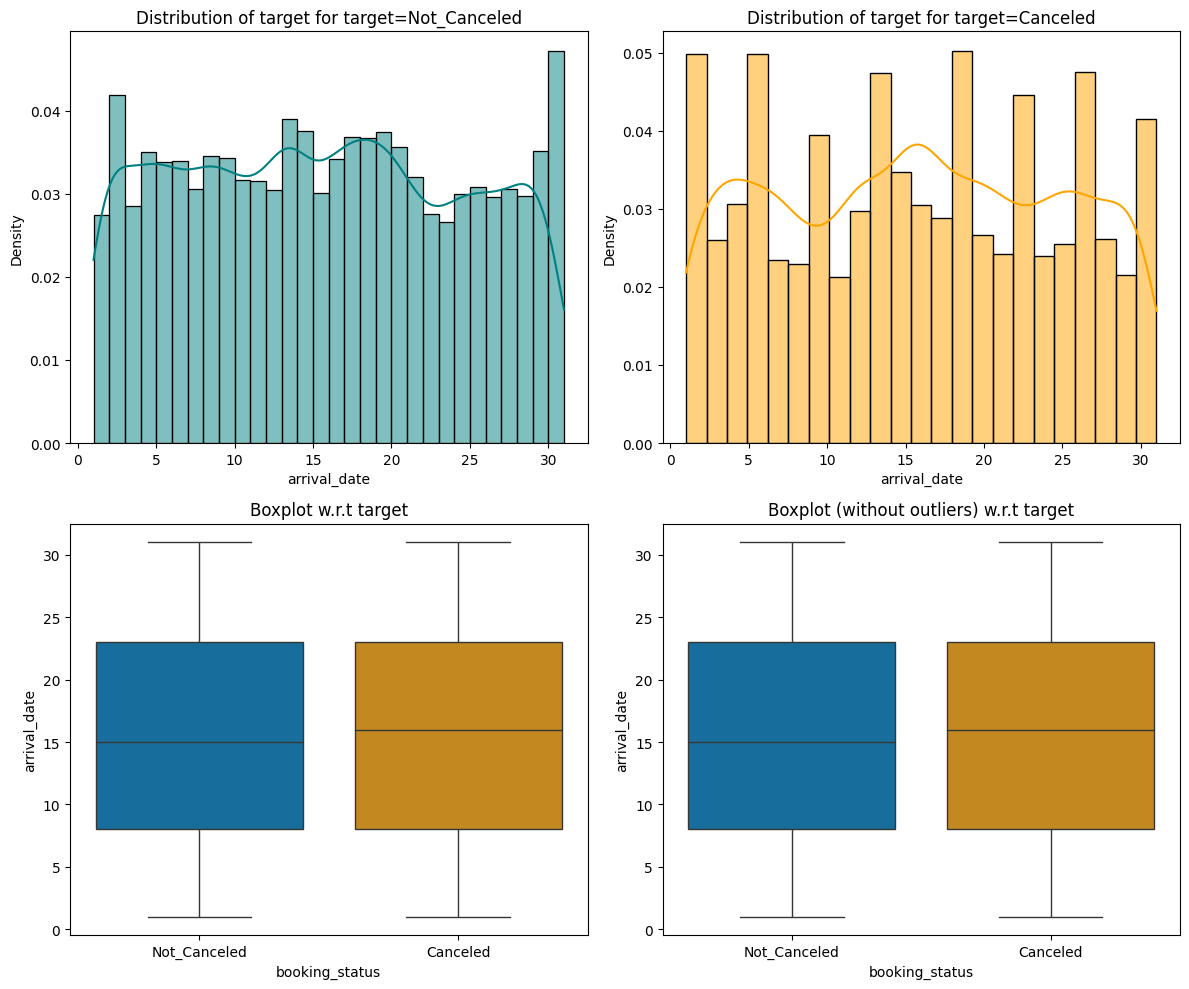

In [ ]:
distribution_plot_wrt_target(df, 'arrival_date', 'booking_status')

- No major differences between canceled and non-canceled bookings, with respect to arrival date.

####**`no_of_weekend_nights vs booking_status`**

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


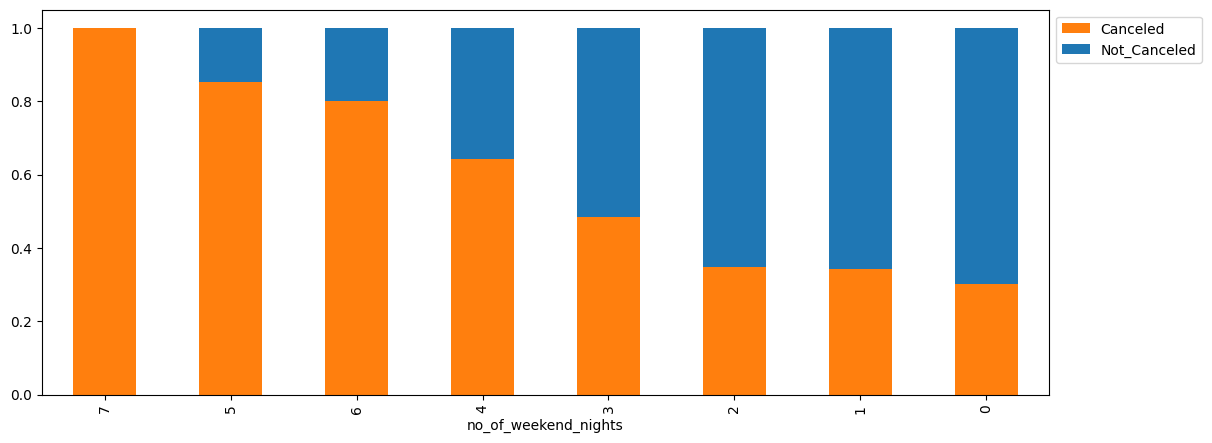

In [ ]:
stacked_barplot(df, 'no_of_weekend_nights', 'booking_status')

####**`market_segment_type vs booking_status`**

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


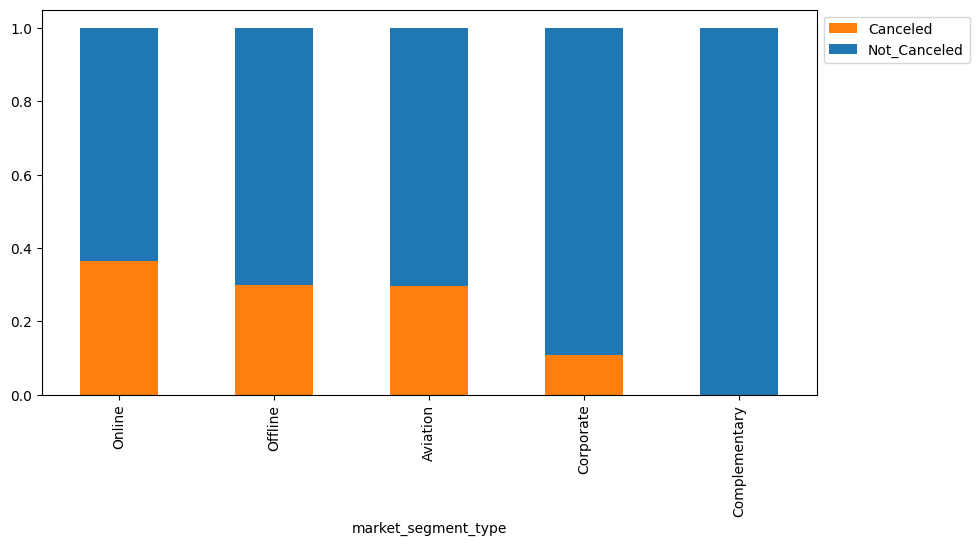

In [ ]:
stacked_barplot(df, 'market_segment_type', 'booking_status')

- Bookings that were complimentary had no cancellations.
- Online bookings made up 64% of the data. Of these bookings, about 38% canceled.
- Corporate stays had the second to lowest proportion of cancellations.

####**`repeated_guest vs booking_status`**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


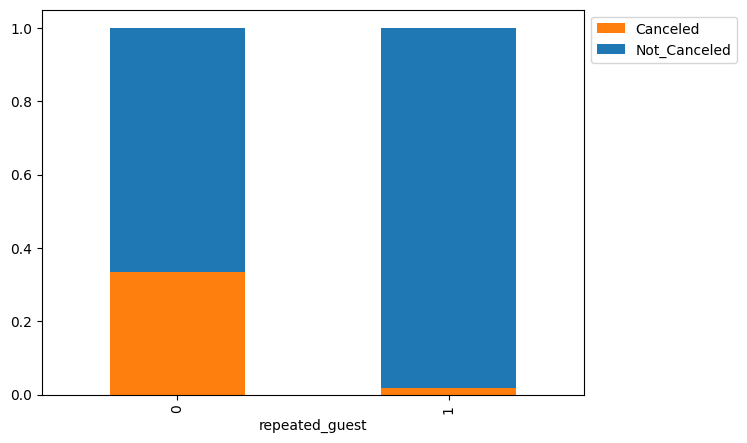

In [ ]:
stacked_barplot(df, 'repeated_guest', 'booking_status')

- 97% of the bookings were made by first-time guests. 37% of these were canceled.
- Repeated guests are less likely to cancel but only make up 3% of all bookings.

####**`no_of_previous_cancellations vs booking_status`**

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


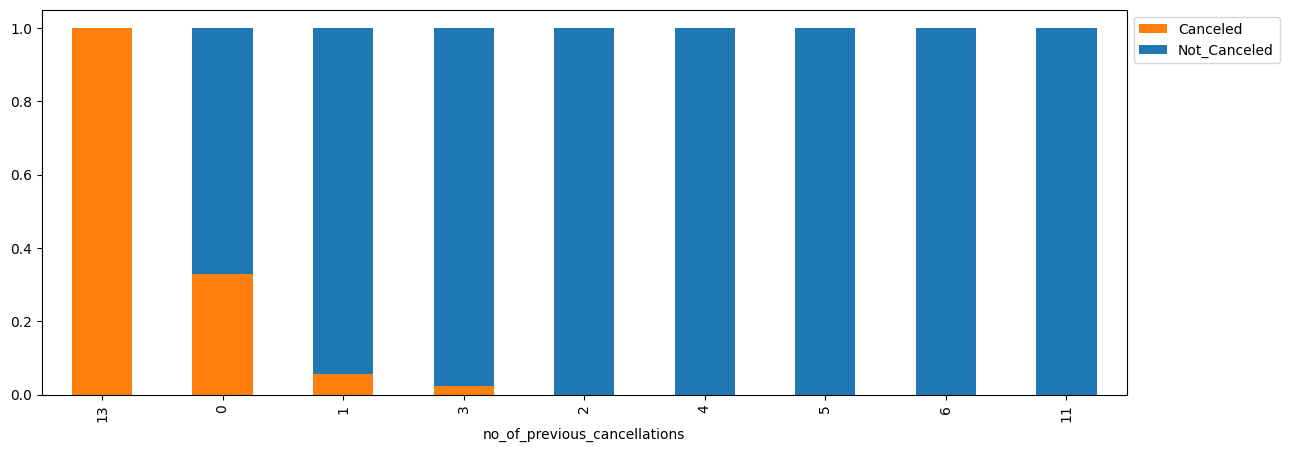

In [ ]:
stacked_barplot(df, 'no_of_previous_cancellations', 'booking_status')

- The number of previous cancellations does not seem to be a strong predictor of current booking status. This is because 100% of guests who had 13 previous cancellations ended up canceling and 0% of guests who  had 11 previous cancellations ended up canceling. A high or low number of previous cancellations shows no consistent trend with respect to current booking status.

####**`no_of_previous_bookings_not_canceled vs booking_status`**

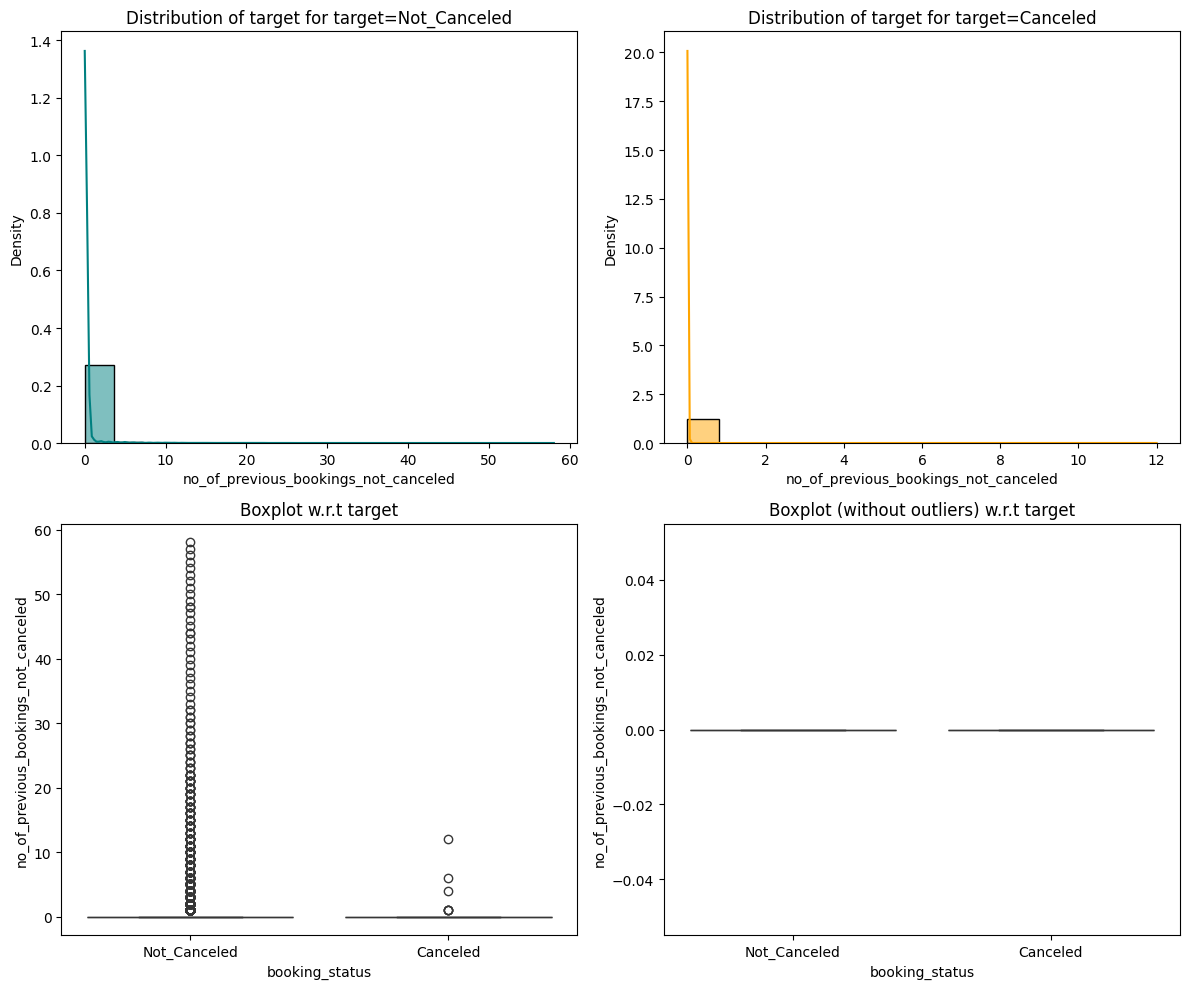

In [ ]:
distribution_plot_wrt_target(df, 'no_of_previous_bookings_not_canceled', 'booking_status')

- The highest distribution of uncanceled reservations are those that have 0 - 5 **previously** uncanceled reservations.
- The highest distribution for canceled reservations are those that have 0 - 1 **previously** uncanceled reservations.
- This suggests that the higher the number of previously uncanceled bookings a guest has, the less likely they are to cancel their current booking.

####**`avg_price_per_room vs booking_status`**

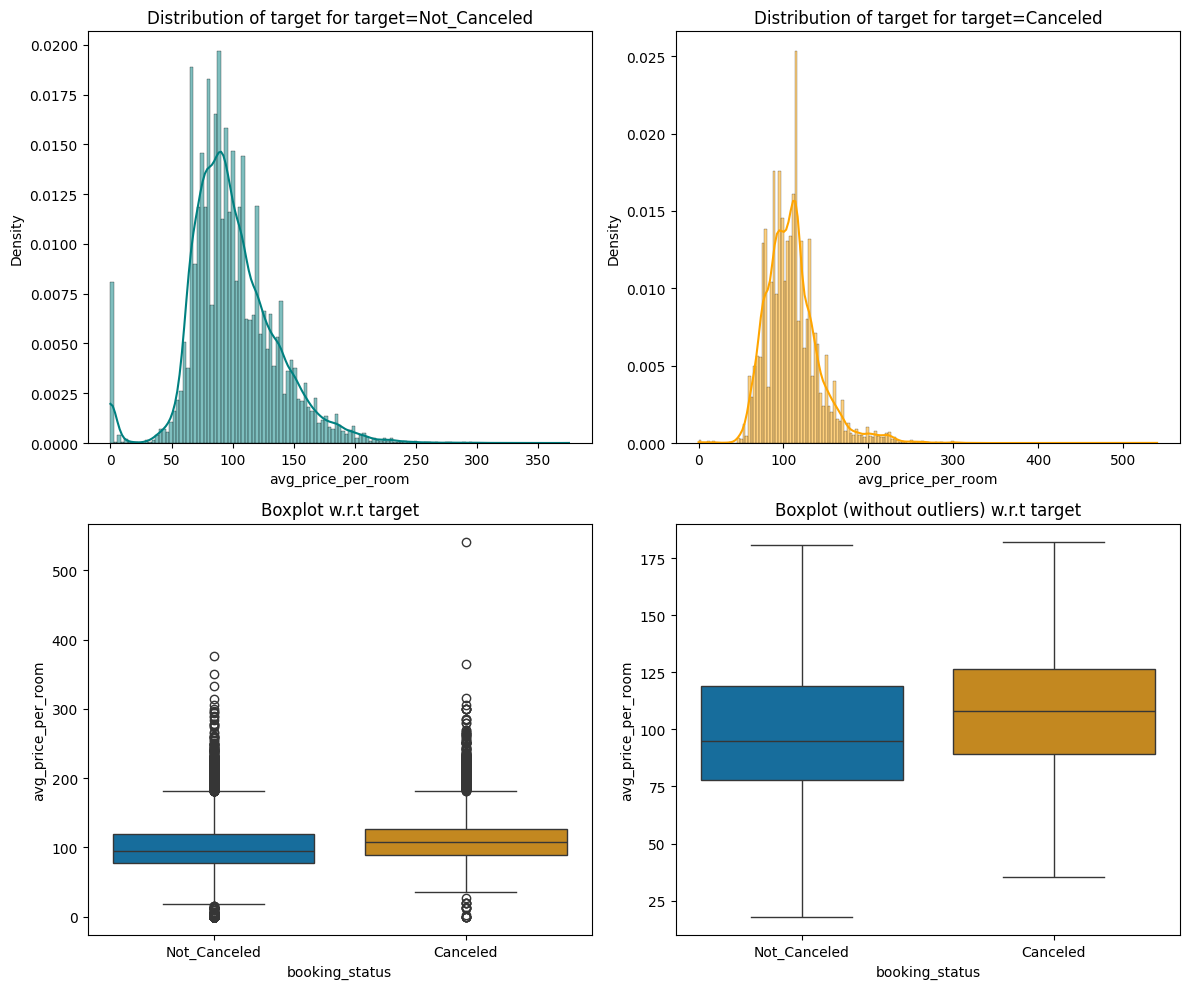

In [ ]:
distribution_plot_wrt_target(df, 'avg_price_per_room', 'booking_status')

- Cancellations tend to happen when the average price per room is high.

###**We will explore any patterns that may exist between various predictors and the number of weekend nights included in a booking.**
- We will create bins for number of weekends nights, according to common groupings discovered in the univariate analysis as follows:
  - 0 - 2 weekend nights will represent shorter stays **(~75% of all data)**.
  - 3 - 5 weekend nights will represent medium length stays **(~25% of all data)**.
  - 6 - 8 weekend nights will represent extended stays **(Less than 1% of all data)**.

In [ ]:
#make a copy of the data frame to avoid modifying the original
df2 = df.copy()

#create bins and add them as a column to the dataframe
df2['no_of_weekend_nights_bins'] = pd.cut(df2['no_of_weekend_nights'], bins=[0,3,6,9], labels=['0-2', '3-5', '6-8'], right=False)
df2.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status no_of_weekend_nights_bins  
0                       0   Not_Canceled                       0-2  
1                       1   Not_Canceled                       0-2  
2                       0       Canceled                       0-2  
3                       0       Canceled                       0-2  
4                       0       Canceled                       0-2

####**Booking Status vs Number of Weekend Nights by Group**

booking_status             Canceled  Not_Canceled    All
no_of_weekend_nights_bins                               
All                           11885         24390  36275
0-2                           11682         24256  35938
3-5                             186           130    316
6-8                              17             4     21
------------------------------------------------------------------------------------------------------------------------


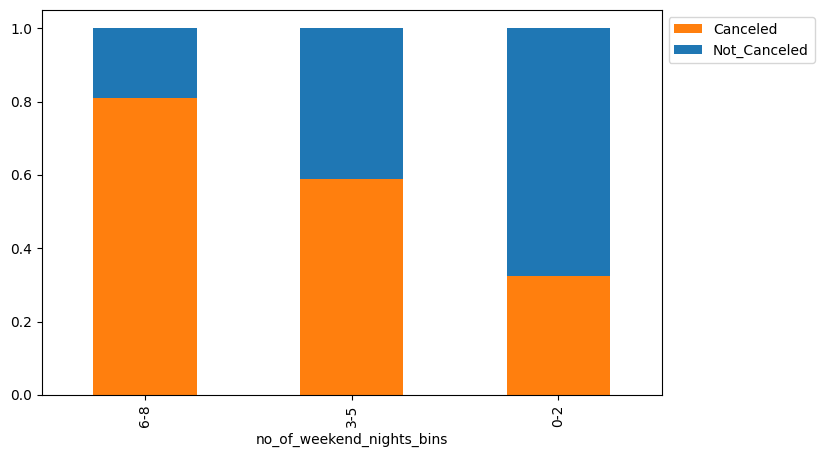

In [ ]:
stacked_barplot(df2, 'no_of_weekend_nights_bins', 'booking_status')

- Reservations that include less weekend nights have lesser proportions of cancellations. These likely represent shorter stays.

####**Average Price Per Room vs Number of Weekend Nights by Group**


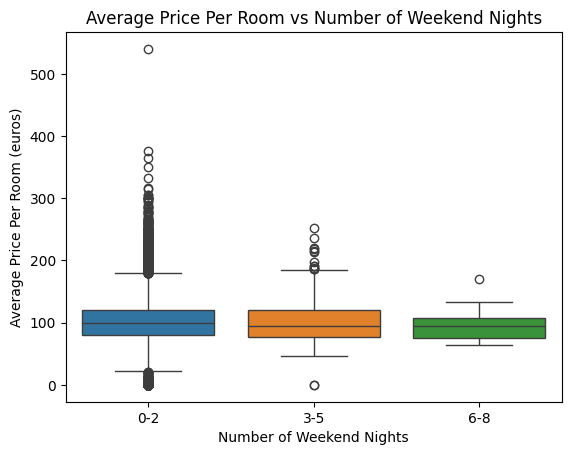

In [ ]:
#generate a boxplot
sns.boxplot(data=df2, x='no_of_weekend_nights_bins', y='avg_price_per_room', hue='no_of_weekend_nights_bins')
plt.title('Average Price Per Room vs Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Average Price Per Room (euros)')
plt.show()

- Longer stays tend to have lower prices, yet still have higher cancellation proportions (per previous section).

###**Let us continue to compare `avg_price_per_room` with various predictors.**

####**`avg_price_per_room vs arrival_month`**

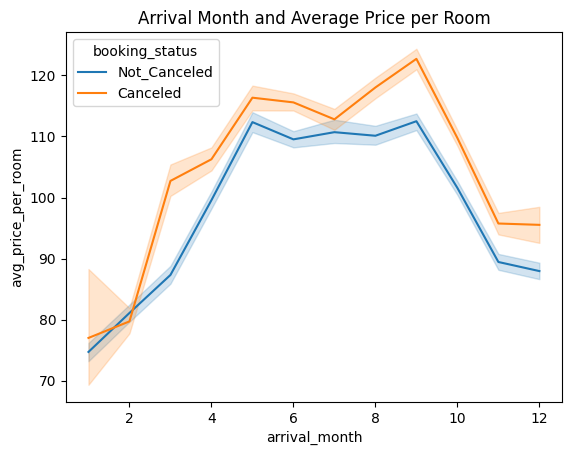

In [ ]:
sns.lineplot(data=df, x='arrival_month', y='avg_price_per_room', hue='booking_status')
plt.title('Arrival Month and Average Price per Room')
plt.show;

- September is the month when the average price per room is the highest, followed by August. Recall that these are among the top 3 busiest months.
  - Reservations that were canceled during September had higher average prices per room compared to those that were not canceled.
  - The discrepancy in price among the canceled and not canceled reservations is the second largest during September.
- January has the lowest average price per room out of all months.
- July had the highest proportion of cancellations out of all months (shown previously) and has a high average price per room.

####**`avg_price_per_room vs lead_time`**

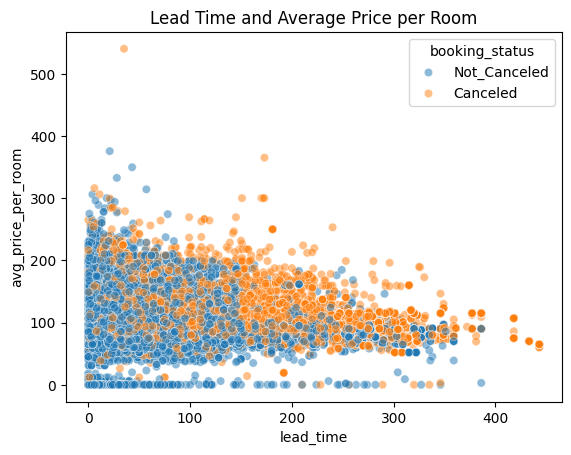

In [ ]:
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status', alpha=0.5)
plt.title('Lead Time and Average Price per Room')
plt.show;

- There is a notable pattern that shows that as lead time increases, the average price per room decreases.
- No significant patterns are shown among canceled and not canceled bookings.

####**`avg_price_per_room vs market_segment_type`**

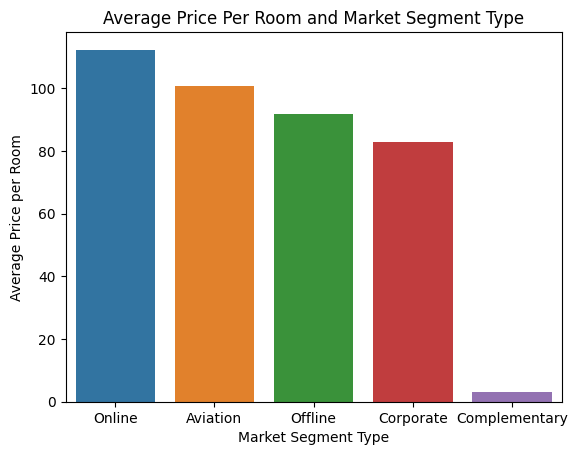

In [ ]:
avg_price = df.groupby('market_segment_type')['avg_price_per_room'].mean().reset_index()
avg_price = avg_price.sort_values(by='avg_price_per_room', ascending=False)
sns.barplot(data=avg_price, x='market_segment_type', y='avg_price_per_room', hue='market_segment_type')
plt.title('Average Price Per Room and Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price per Room')
plt.show()

- The online and aviation market segments have the highest average prices.

####**`avg_price_per_room vs repeated_guest`**

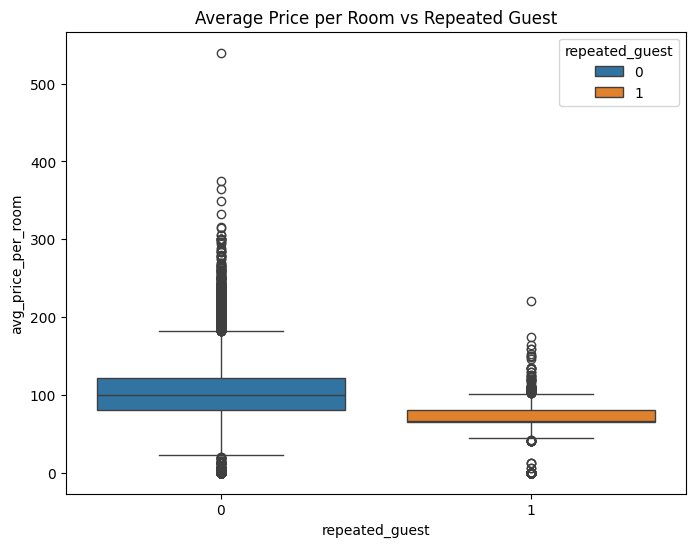

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='repeated_guest', y='avg_price_per_room', hue='repeated_guest')
plt.title('Average Price per Room vs Repeated Guest')
plt.show;

- Repeated guests tend to lower average prices per room.

####**`avg_price_per_room vs no_of_special_requests`**

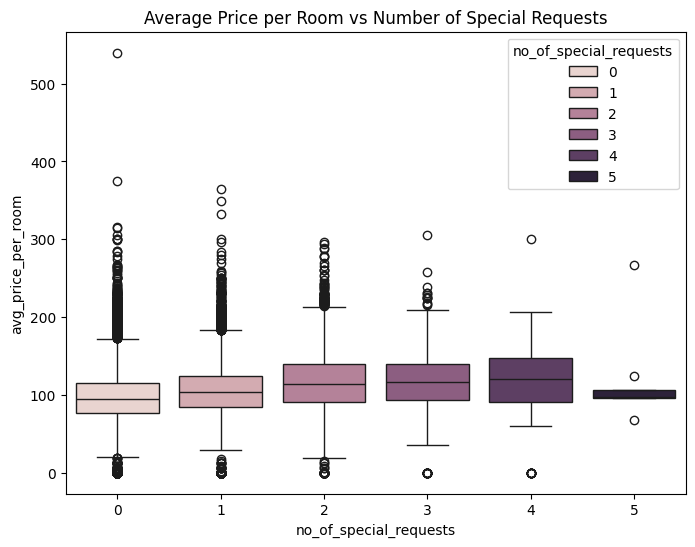

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='no_of_special_requests', y='avg_price_per_room', hue='no_of_special_requests')
plt.title('Average Price per Room vs Number of Special Requests')
plt.show;

- In general, the average price per room increases as the number of special requests increases.

## **Data Preprocessing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###**Check for missing values**

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing values.

###**Feature Engineering**

####**We will add a column, showing the ratio of previous cancellations out of all previous bookings.**

In [ ]:
#add a column for ratio of previous cancellations out of all previous bookings
df['ratio_of_prev_cancellations'] = df['no_of_previous_cancellations'] / (df['no_of_previous_cancellations'] + df['no_of_previous_bookings_not_canceled'])
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  ratio_of_prev_cancellations  
0                       0   Not_Canceled                          NaN  
1                       1   Not_Canceled                          NaN  
2                       0       Canceled                          NaN  
3                       0       Canceled                          NaN  
4                       0       Canceled                          NaN

- Breakdown of `ratio of prev_cancellations`:
  - 0 values represent guests who have had all successful bookings in the past with no previous cancellations.
  - NaN values represent first time guests. We will convert these entries to -1 to represent our first time guest population.
  - All other ratios represent the proportion of previously canceled bookings out of all bookings that were previously made.

In [ ]:
#replace NaN values in ratio_of_prev_cancellations with -1
df['ratio_of_prev_cancellations'].replace(np.nan, -1, inplace=True)
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  ratio_of_prev_cancellations  
0                       0   Not_Canceled                     -1.00000  
1                       1   Not_Canceled                     -1.00000  
2                       0       Canceled                     -1.00000  
3                       0       Canceled                     -1.00000  
4                       0       Canceled                     -1.00000

###**Outlier Detection**

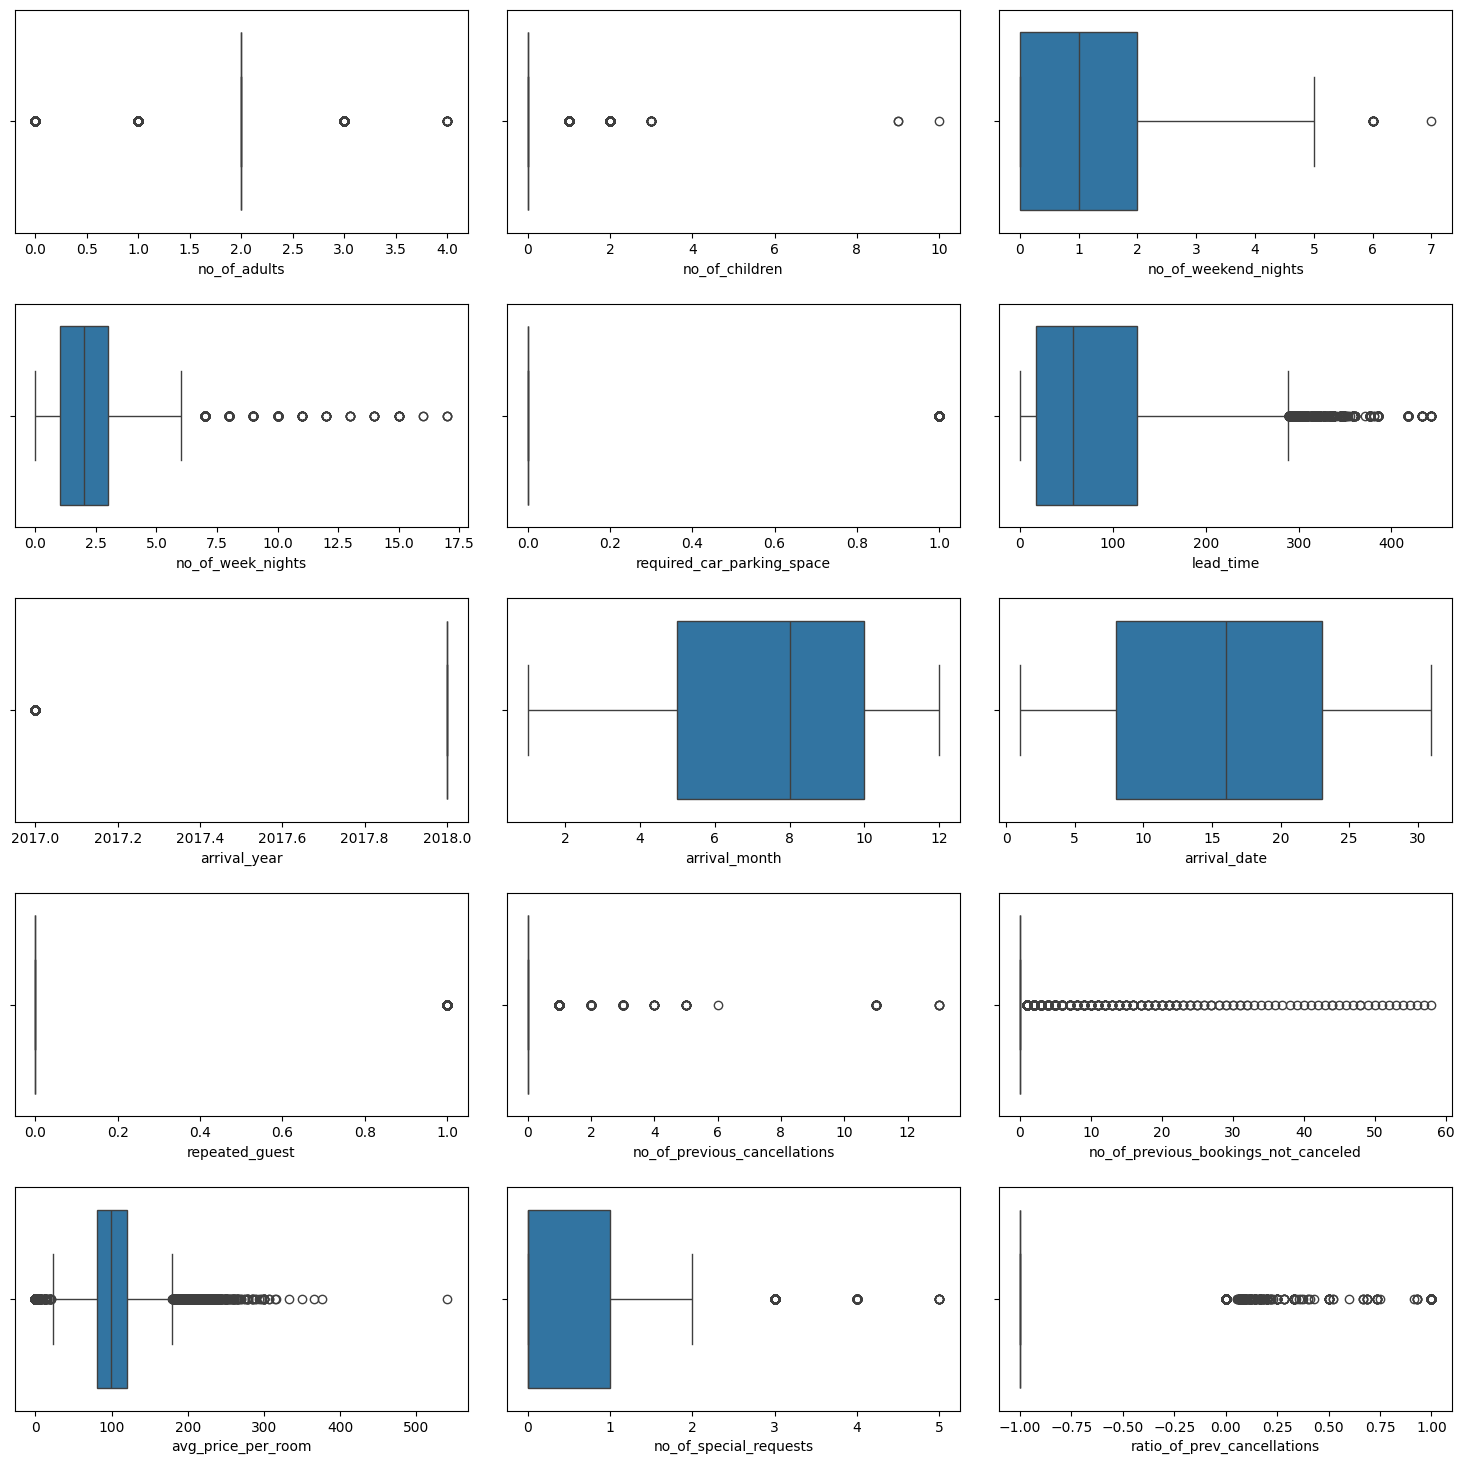

In [ ]:
#detect outliers
numeric_col = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize=(15,15))

for i, predictor in enumerate(numeric_col):
  plt.subplot(5, 3, i+1)
  sns.boxplot(data=df, x=predictor, whis=1.5)
  plt.tight_layout(pad=2)

- Find the percentage of outliers in each column of data using IQR.

In [ ]:
#calculate 25th and 75th percentiles
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#calculate values of upper and lower whiskers
upper_whisker =  Q3 + 1.5*IQR
lower_whisker = Q1 - 1.5*IQR

In [ ]:
#find percentage of outliers for each column
print('Percentage of Outliers per Column:')
print(((df[numeric_col] < lower_whisker) | (df[numeric_col] > upper_whisker)).sum() / df.shape[0] * 100)

Percentage of Outliers per Column:
no_of_adults                           28.02757
no_of_children                          7.43763
no_of_weekend_nights                    0.05789
no_of_week_nights                       0.89318
required_car_parking_space              3.09855
lead_time                               3.66919
arrival_year                           17.95727
arrival_month                           0.00000
arrival_date                            0.00000
repeated_guest                          2.56375
no_of_previous_cancellations            0.93177
no_of_previous_bookings_not_canceled    2.23846
avg_price_per_room                      4.67540
no_of_special_requests                  2.09786
ratio_of_prev_cancellations             2.56375
dtype: float64


- The outliers appear to be legitimate observations so we will leave them as is.

###**Data Preprocessing**

####**Drop Booking_ID**

In [ ]:
df.drop('Booking_ID', axis=1, inplace=True)

## **EDA**

- It is a good idea to explore the data once again after manipulating it.

###**Let us regenerate a heatmap for numerical columns**

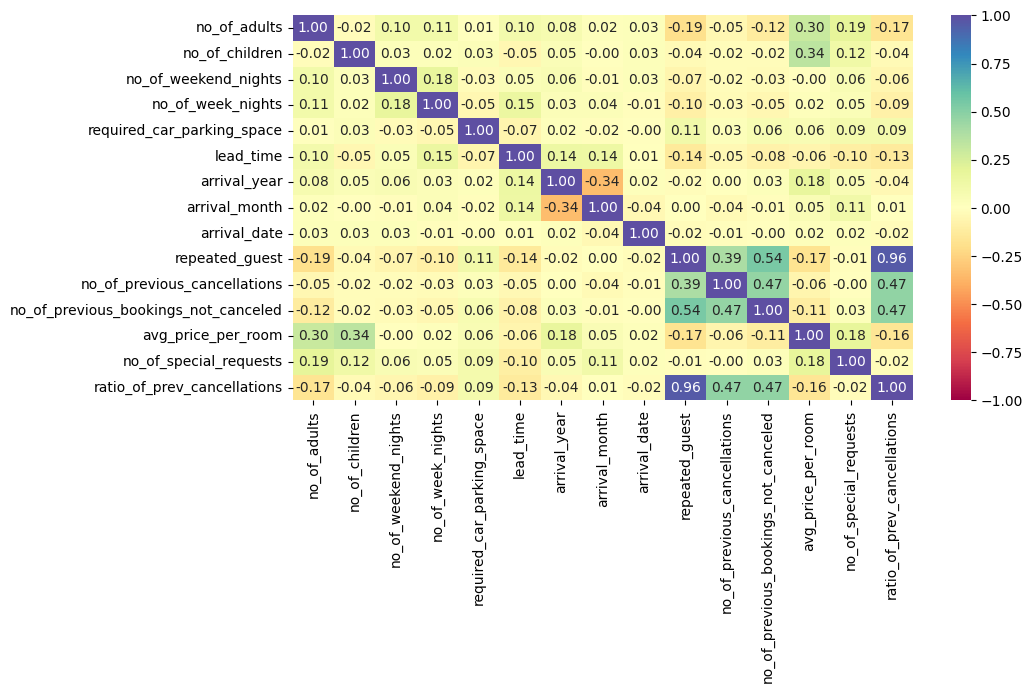

In [ ]:
#regenerate a heatmap for numerical columns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='Spectral')
plt.show()

- There is a strong positive linear relationship between repeated_guest and ratio_of_prev_cancellations. This is because the values of the ratios are directly related to the whether or not guests are repeated guests (e.g. a ratio of -1 represents a first-time guest).
- No other significant changes are noted.

###**Let us explore ratio of previous cancellations.**

####**Distribution of ratio of previous cancellations**

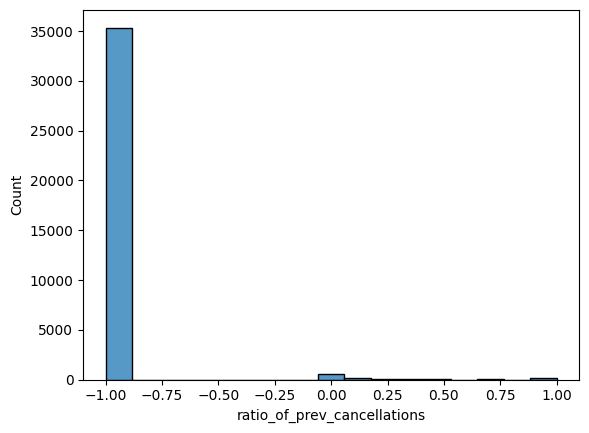

In [ ]:
#generate a histogram for ratio_of_prev_cancellations
sns.histplot(data=df, x='ratio_of_prev_cancellations')
plt.show()

- Recall breakdown of **`ratio of prev_cancellations`**:
  - 0 values represent guests who have had all successful bookings in the past with no previous cancellations.
  - Values of -1 represent the first time guest population.
  - All other ratios represent the proportion of previously canceled bookings, out of all bookings that were previously made.
- Most guests are first-time guests, thus have no booking history.

####**Let us compare `ratio_of_prev_cancellations vs booking status`**

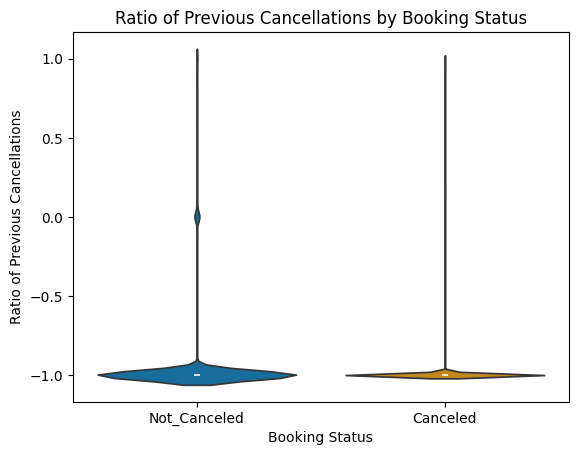

In [ ]:
#plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='booking_status', y='ratio_of_prev_cancellations', palette='colorblind')
plt.title('Ratio of Previous Cancellations by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Ratio of Previous Cancellations')
plt.show()


- Most first time guests did not cancel their reservation.
- Guests who had no cancellations in their history were less likely to cancel their current booking.

####**All predictors that were manipulated/created have been analyzed.**

###**Data Preparation for Modeling**

####**Encode target variable for easier analysis:**
  - 0 indicates not canceled
  - 1 indicates canceled

In [ ]:
df['booking_status'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [ ]:
df['booking_status'].value_counts()

booking_status
0    24390
1    11885
Name: count, dtype: int64

####**Seperate independent and dependent variables**

In [ ]:
#separate independent from dependent variables
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

#add a constant
X = sm.add_constant(X)

#create dummy variables
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first=True,
    dtype='float'
)


X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.00000             2               0                     1   
1 1.00000             2               0                     2   
2 1.00000             1               0                     2   
3 1.00000             2               0                     0   
4 1.00000             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0             10             2               0                             0   
1             11             6               0                             0   
2              2            28               0                             0   
3              5            20               0                             0   
4              4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  ratio_of_prev_cancellations  \
0                       0                     -1.00000   
1                       1                     -1.00000   
2                       0                     -1.00000   
3                       0                     -1.00000   
4                       0                     -1.00000   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                        0.00000                        0.00000   
1                        0.00000                        0.00000   
2                        0.00000                        0.00000   
3                        0.00000                        0.00000   
4                        0.00000                        0.00000   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                         0.00000                         0.00000   
1                         1.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         1.00000                         0.00000   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                         0.00000                            0.00000   
1                         0.00000                            0.00000   
2                         0.00000                            0.00000   
3    

- All categorical predictors have been one hot-encoded except for arrival year.

####**Let's review the distribution of the target variable**

In [ ]:
df['booking_status'].value_counts(normalize=True)

booking_status
0   0.67236
1   0.32764
Name: proportion, dtype: float64

- Since there is a class imbalance (67:33 ratio for not canceled to canceled), we will use the feature `stratify=y` to preserve the class distribution in both the training and test sets.

####**Now we will split the data into test and train sets**

In [ ]:
#split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Number of rows in train data = ', X_train.shape[0])
print('Number of rows in test data = ', X_test.shape[0])

Number of rows in train data =  25392
Number of rows in test data =  10883


## **Checking Multicollinearity**

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.
- We will check for multicollinearity on the train set by utilizing 2 functions:
  - Function 1 will calculate VIFs for set predictors
  - Function 2 will detect VIFs > 5 to detect multicollinearity
- General rule of thumb:
  - If VIF is between 1 and 5, then there is low multicollinearity.
  - If VIF is between 5 and 10, we say there is moderate multicollinearity.
  - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
#user defined function to calculate vif
def calc_vif(predictors):
  vif_data = pd.DataFrame()

  #retrieve column names
  vif_data['Variable'] = predictors.columns

  #calculate vif
  vif_data['VIF'] = [
      variance_inflation_factor(predictors.values, i)
      for i in range(predictors.shape[1])
  ]

  return vif_data

#define a function that will detect high VIFs > 5
def high_vif(predictors): #predictors = independent variables
  vif_data = calc_vif(predictors)
  filtered_vif = vif_data[vif_data['VIF'] > 5]
  print('VIFs over 5:')
  print(filtered_vif)

####**Calculate VIFs on X_train**

In [ ]:
# Calculating VIF for X_train
print('VIFs for X_train:')
print(calc_vif(X_train))
print('-' * 60)

#show vifs > 5 for X_train
high_vif(X_train)

VIFs for X_train:
                                Variable            VIF
0                                  const 39846067.49886
1                           no_of_adults        1.34515
2                         no_of_children        2.00721
3                   no_of_weekend_nights        1.06726
4                      no_of_week_nights        1.09522
5             required_car_parking_space        1.03622
6                              lead_time        1.40192
7                           arrival_year        1.44315
8                          arrival_month        1.27740
9                           arrival_date        1.00806
10                        repeated_guest       18.90831
11          no_of_previous_cancellations        1.73150
12  no_of_previous_bookings_not_canceled        1.81371
13                    avg_price_per_room        2.03520
14                no_of_special_requests        1.24821
15           ratio_of_prev_cancellations       17.76255
16         type_of_meal_plan_M

- It is noted that the market_segment_type_Online has the highest VIF but this is likely because the category is one-hot encoded. We will further explore what the best course of action will be later.
- For now, we will drop ratio_of_prev_cancellations since we can glean similar data from other predictors.

In [ ]:
#drop ratio_of_prev_cancellations
X_train1 = X_train.drop(['ratio_of_prev_cancellations'], axis=1)
X_test1 = X_test.drop(['ratio_of_prev_cancellations'], axis=1)

####**Calculate VIFs on X_train1**

In [ ]:
# Calculating VIF for X_train1
print('VIFs for X_train1:')
print(calc_vif(X_train1))
print('-' * 60)

#show vifs > 5 for X_train1
high_vif(X_train1)

VIFs for X_train1:
                                Variable            VIF
0                                  const 39595445.81095
1                           no_of_adults        1.34506
2                         no_of_children        2.00721
3                   no_of_weekend_nights        1.06725
4                      no_of_week_nights        1.09437
5             required_car_parking_space        1.03494
6                              lead_time        1.40192
7                           arrival_year        1.43326
8                          arrival_month        1.27740
9                           arrival_date        1.00763
10                        repeated_guest        1.75019
11          no_of_previous_cancellations        1.32201
12  no_of_previous_bookings_not_canceled        1.57086
13                    avg_price_per_room        2.03263
14                no_of_special_requests        1.24723
15         type_of_meal_plan_Meal Plan 2        1.26182
16         type_of_meal_plan_

- Removing **`ratio_of_prev_cancellations`** also removed **`repeated_guest`** from the high VIFs list.
- The online and offline market segment types have the highest VIFs, which is expected since they are of the same one-hot encoded category. Since this is not unusual, we will not drop either one.

## **Building a Logistic Regression model**

####**Fitting Logistic Regression Model**

In [ ]:
#fit model on the train set
logit = sm.Logit(y_train, X_train1)
lg = logit.fit()
print(lg.summary())

         Current function value: 0.422351
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.3322
Time:                        22:37:10   Log-Likelihood:                -10724.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -886.9563    121.332     -7.310      0.000   -1124.762

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##**Model performance metrics**

- In this context, our errors have 2 possibilities:
  - False negatives which indicate that we have predicted that a customer will not cancel but actually ends up canceling their booking.
  - False positives which indicate that we have predicted that a customer will cancel but actually ends up not canceling.
- More loss of revenue comes from false negatives. Therefore, **we will prioritize recall and F1 score** when we evaluate model performance.
- We will use two functions to evaluate the model.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors.astype("float")) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with row-wise percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors.astype("float")) > threshold
    cm = confusion_matrix(target, y_pred)
    cm_perc = [[x/sum(row) for x in row] for row in cm]
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / row.sum())]
            for row in cm for item in row
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_perc, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

####**Performance check for model `lg`**
- Confusion Matrix on Train Set:

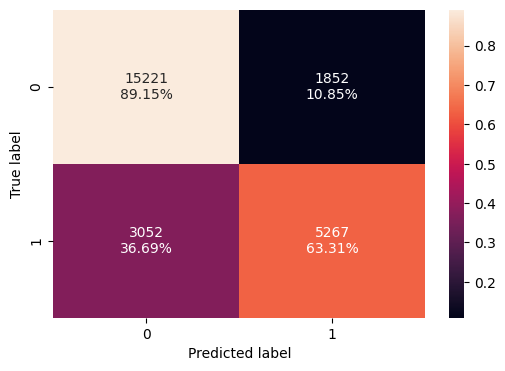

In [ ]:
confusion_matrix_statsmodels(lg, X_train1, y_train)

In [ ]:
print("Train performance:")
print(model_performance_classification_statsmodels(lg, X_train1, y_train))
print('-' * 40)
print("Test performance:")
print(model_performance_classification_statsmodels(lg, X_test1, y_test))

Train performance:
   Accuracy  Recall  Precision      F1
0   0.80687 0.63313    0.73985 0.68234
----------------------------------------
Test performance:
   Accuracy  Recall  Precision      F1
0   0.80391 0.62703    0.73553 0.67696


- The recall score says that we are able to identify 63% of all bookings that will be canceled.
- The model can identify 89% of bookings that will not be canceled.
- The F1 score is decent but we will try to increase its value.
- The values among test and train sets are close in value indicating that the model is not overfitting.

### **Removing high p-value variables**



- Predictors with high p-values, indicate that they do not add value to our classification model.
- We will use a loop to systematically remove these features.
- The said loop will execute the following:

  - It will generate an logistic regression model, using the current train set.
  - It will detect the feature with the maximum p-value.
  - If the p-value > 0.05, the feature will be removed from the initial list of features.
  - The previous steps will be repeated until there are no longer features with p-values over 0.05.
- Once this happens, a list will be generated containing only features that shall be kept in the next run of the model.

In [ ]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux.astype(float)).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
#update predictors
X_train2 = X_train1[selected_features]
X_test2 = X_test1[selected_features]

####**Update Logit Model**

In [ ]:
#fit model on the train set
logit1 = sm.Logit(y_train, X_train2)
lg1 = logit1.fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.422990
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.3312
Time:                        22:37:13   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.8889    120.911     -7.194    

- All predictors with p-values greater than 0.05 have been removed. We can now say that model `lg1`, and its corresponding features, is our final model.

###**Coefficient Interpretations**

- We can observe that there are both positive and negative coefficient values.
- Negative coefficient values indicate that the probability of a guest canceling decreases, when a unit increase occurs in the corresponding variable, holding all other variables constant.
- Positive coefficient values indicate that the probability of a guest canceling increases, when a unit increase occurs in the corresponding variable, holding all other variables constant.

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_weekend_nights  no_of_week_nights  \
Odds           0.00000               1.16163            1.03686   
Change_odd% -100.00000              16.16282            3.68572   

             required_car_parking_space  lead_time  arrival_year  \
Odds                            0.19893    1.01601       1.53690   
Change_odd%                   -80.10671    1.60144      53.69000   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.95202         0.04620                       1.33534   
Change_odd%       -4.79758       -95.37970                      33.53397   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.01923                 0.22639   
Change_odd%             1.92270               -77.36112   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               1.18160                         1.23349   
Change_odd%                       18.15955                        23.34870   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.68837                         0.76503   
Change_odd%                       -31.16329                       -23.49673   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.50261                         0.47622   
Change_odd%                       -49.73868                       -52.37831   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                                0.26847                        0.41852   
Change_odd%                       -73.15301                      -58.14827   

             market_segment_type_Offline  
Odds                             0.16991  
Change_odd%                    -83.00891

#### **Coefficient Interpretations in Detail:**

- `no_of_weekend_nights`: Holding all other variables constant, a unit increase in the number of weekend nights will increase the odds of a guest canceling by 16.2%.
- `no_of_week_nights`: Holding all other variables constant, a unit increase in the number of week nights will increase the odds of a guest canceling by about 3.7%.
- `required_car_parking_space`: Holding all other variables constant, a unit increase in required parking spaces will decrease the likelihood of a guest to cancel by 80.1%.
- `lead_time`: Holding all other variables constant, a unit increase in lead time will increase the odds of a guest canceling by 1.6%.
- `arrival_year`: A unit increase in arrival year will increase the odds of a booking getting canceled by 53.7%.
- `arrival_month`: A unit increase in arrival month will decrease the odds of a guest canceling by 4.8%
- `repeated_guest`: Repeated guests (value of 1) are 95% less likely to cancel their current booking, holding all other variables constant.
- `no_of_previous_cancellations`: A unit increase in the number of previous cancellations will raise the odds of a guest canceling by 33.5%, holding all other variables constant.
- `avg_price_per_room`: A unit increase in the average price per room will increase the odds of a guest canceling by 1.9%, holding all other variables constant.
- `no_of_special_requests`: A unit increase in the number of special requests will decrease the likelihood of a guest canceling by 77.4%, holding all other variables constant.
- `Meal Plans`:
  - `type_of_meal_plan_Meal Plan 2`: A guest who chose Meal Plan 2 is 18.2% more likely to cancel, compared to guests who chose meal plan 1 or meal plan 3, holding all other variables constant.
  - `type_of_meal_plan_Not Selected`: A guest who did not select a meal plan is 23.3% more likely to cancel, compared to guests who chose mealplan 1 or meal plan 3, holding all other variables constant.
- `Room Type`:
  - `room_type_reserved_Room_Type 2`: Guests who chose Room Type 2 are 31.2% less likely to cancel, compared to guests who chose room type 1 or room type 3, holding all other variables constant.
  - `room_type_reserved_Room_Type 4`: Guests who chose Room Type 4 are 23.5% less likely to cancel, compared to guests who chose room type 1 or room type 3, holding all other variables constant.
  - `room_type_reserved_Room_Type 5`: Guests who chose Room Type 5 are 49.7% less likely to cancel, compared to guests who chose room type 1 or room type 3, holding all other variables constant.
  - `room_type_reserved_Room_Type 6`: Guests who chose Room Type 6 are 52.4% less likely to cancel, compared to guests who chose room type 1 or room type 3, holding all other variables constant.
  - `room_type_reserved_Room_Type 7`: Guests who chose Room Type 7 are 73.2% less likely to cancel, compared to guests who chose room type 1 or room type 3, holding all other variables constant.
- `Market Segment`:
  - `market_segment_type_Corporate`: Guests from the corporate market segment are 58.1% less likely to cancel compared to guests that are from the online, complimentary and aviation market segments, holding all other variables constant.
  - `market_segment_type_Offline`: Guests from the offline market segment are 83% less likely to cancel compared to guests that are from the online, complimentary and aviation market segments, holding all other variables
  constant.

###**Check performance on the new model `lg1`**
- Note that this model uses the default threshold.

####**Training set performance**

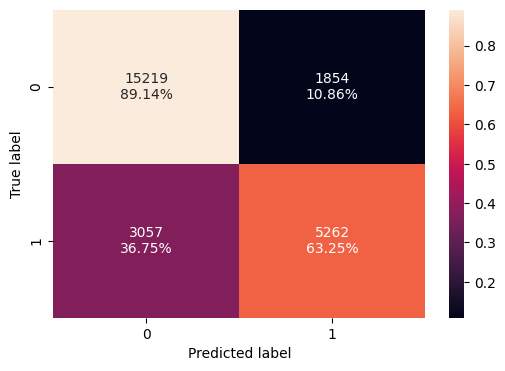

In [ ]:
#generate confusion matrix
confusion_matrix_statsmodels(lg1, X_train2, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80659 0.63253    0.73946 0.68183

####**Test set performance**

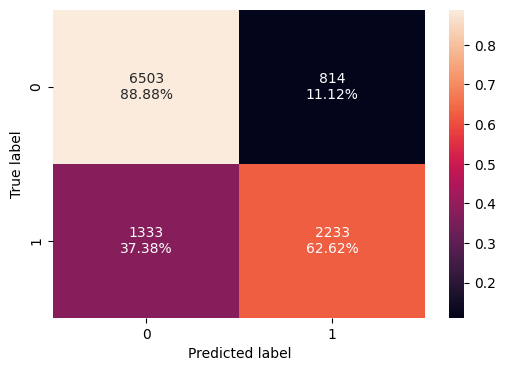

In [ ]:
#generate confusion matrix
confusion_matrix_statsmodels(lg1, X_test2, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80272 0.62619    0.73285 0.67534

- No major changes have occurred in the model's performance, in comparison to the initial model.
- Similar performance values are noted across the test and train sets, indicating that the model is not overfitting.
- F1 score shows a slight decrease in value from train to test set.

## **Model Performance Improvement**

- We will attempt to increase the F1 score and recall score by changing the model threshold.
- We will begin by checking the ROC curve, compute the area under the ROC curve (ROC-AUC) and then use it to find the optimal threshold.
- Then, we will check the Precision-Recall curve to find the right balance between precision and recall, as we are prioritizing F1 score.

### **ROC Curve and ROC-AUC**

####**ROC-AUC on training set**



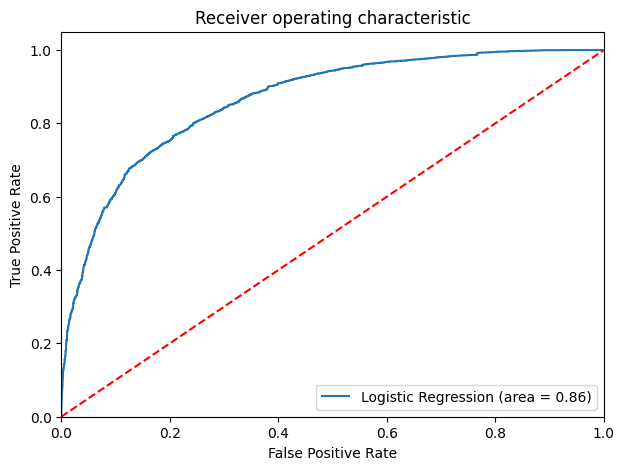

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

#### **Optimal threshold using ROC-AUC curve**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3329571917391589


####**Check model performance (with ROC-AUC threshold) on training set:**

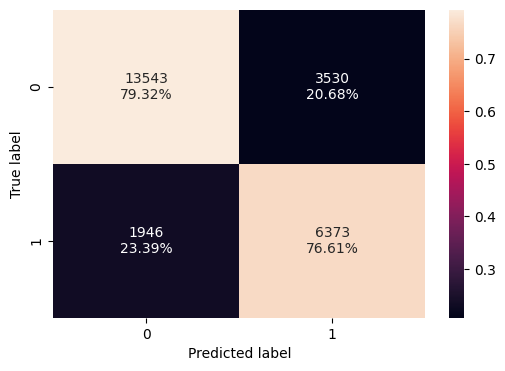

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train2, y_train, threshold=optimal_threshold_auc_roc)

- The occurences of false positives increased but the occurences of false negatives decreased, using the threshold generated by ROC-
AUC curve.

In [ ]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_train2, y_train, threshold=optimal_threshold_auc_roc)
print('Train performance:')
log_reg_model_train_perf_threshold_auc_roc

Train performance:


Accuracy  Recall  Precision      F1
0   0.78434 0.76608    0.64354 0.69948

- In comparison to the model with a default threshold:
  - Accuracy decreased by 2%.
  - Recall increased by 13%.
  - Precision decreased by about 10%.
  - F1 score increased by 2%.

####**Check model performance (with ROC-AUC threshold) on test set:**

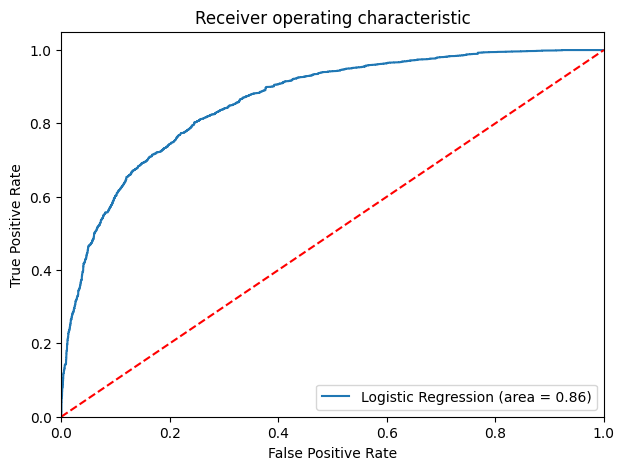

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

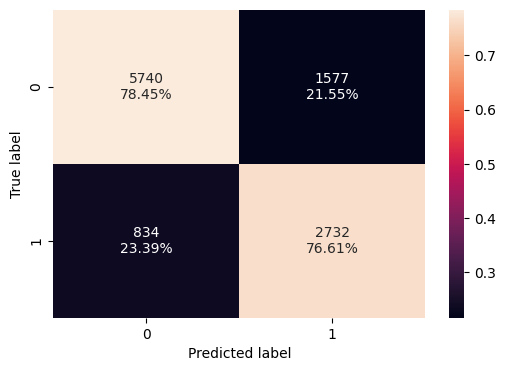

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print('Test performance:')
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.77846 0.76612    0.63402 0.69384

- In comparison to the model with the default threshold:
  - Accuracy decreased by 2%.
  - Recall increased by 13%.
  - Precision decreased by about 10%.
  - F1 score increased by about 1%.
- The model at the ROC-AUC threshold does not show signs of overfitting.

### **Precision-Recall Curve**

####**We will calculate the optimal threshold generated by the Precision-Recall Curve**

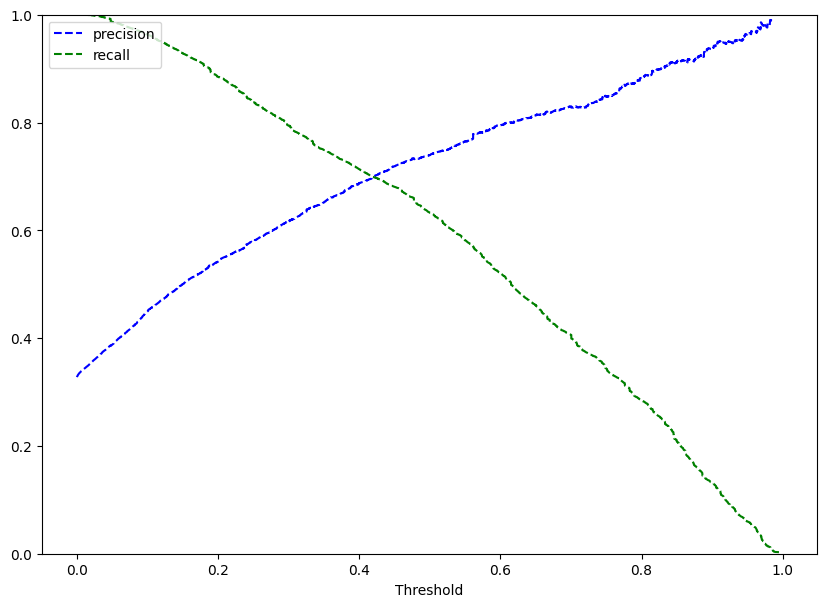

In [ ]:
y_scores = lg1.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At a threshold = 0.42, we get balanced values of precision and recall .

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

####**Checking model performance (Precision-Recall curve threshold) on training set:**

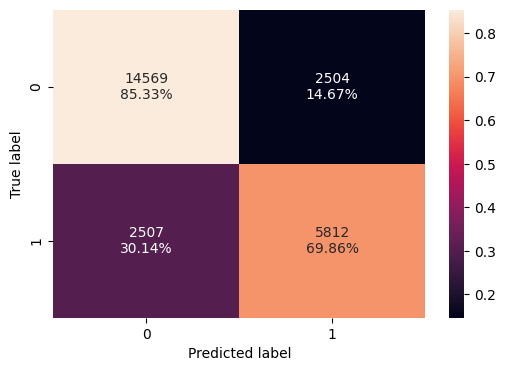

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train2, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train2, y_train, threshold=optimal_threshold_curve)
print('Train performance:')
log_reg_model_train_perf_threshold_curve

Train performance:


Accuracy  Recall  Precision      F1
0   0.80265 0.69864    0.69889 0.69877

- In comparison to the model with the ROC-AUC threshold:
  - Accuracy increased by 2%
  - Recall is 7% lower here,
  - Precision has increased by 6%.
  - F1 score generally stayed the same.

####**Checking model performance (Precision-Recall curve threshold) on test set:**

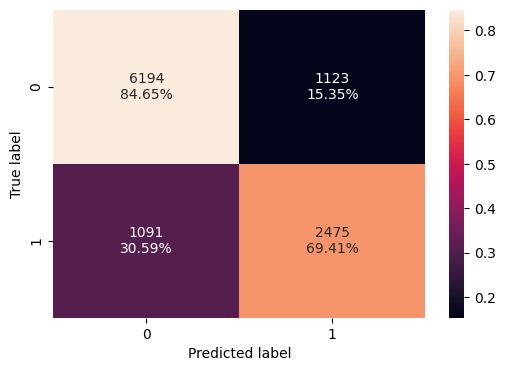

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test2, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test2, y_test, threshold=optimal_threshold_curve
)
print('Test performance:')
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.79656 0.69405    0.68788 0.69095

- In comparison to the model with the ROC-AUC threshold:
  - Accuracy increased by 2%
  - Recall is 8% lower here,
  - Precision has increased by 6%.
  - F1 score generally stayed the same.

## **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression Threshold =  0.33",
    "Logistic Regression Threshold = 0.42",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression statsmodel  \
Accuracy                          0.80659   
Recall                            0.63253   
Precision                         0.73946   
F1                                0.68183   

           Logistic Regression Threshold =  0.33  \
Accuracy                                 0.78434   
Recall                                   0.76608   
Precision                                0.64354   
F1                                       0.69948   

           Logistic Regression Threshold = 0.42  
Accuracy                                0.80265  
Recall                                  0.69864  
Precision                               0.69889  
F1                                      0.69877

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression Threshold = 0.33",
    "Logistic Regression Threshold = 0.42",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression statsmodel  \
Accuracy                          0.80272   
Recall                            0.62619   
Precision                         0.73285   
F1                                0.67534   

           Logistic Regression Threshold = 0.33  \
Accuracy                                0.77846   
Recall                                  0.76612   
Precision                               0.63402   
F1                                      0.69384   

           Logistic Regression Threshold = 0.42  
Accuracy                                0.79656  
Recall                                  0.69405  
Precision                               0.68788  
F1                                      0.69095


- The model with a threshold of 0.33 has given a generalized performance on training and test set. It has the highest recall and F1 scores. Therefore, it can be selected as the final logistic regression model.

## **Final Model Summary**

- The logistic regression model has given a generalized performance on training and test set.
- Using the threshold of 0.33 will allow us to detect 77% of the bookings that will get canceled. Being able to predict this will help the hotel reduce revenue losses due to cancellations.
- This model will allow is to accurately label 78% of the bookings that will not get canceled as well.

## **Building a Decision Tree model**

### **Model Evaluation**

- We want to maximize the recall score to reduce the number of false negatives. That is, we want to identify as many bookings that will be canceled as possible.
- We also want to maintain a good balance between recall and precision scores so we want to prioritize F1 score as well.
- To evaluate our decision tree models, we will use the two functions that follow.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with row wise percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    cm_perc = [[x/sum(row) for x in row] for row in cm]
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / row.sum())]
            for row in cm for item in row
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###**Decision Tree (default)**

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

####**Basic Model Performance on Training Set**

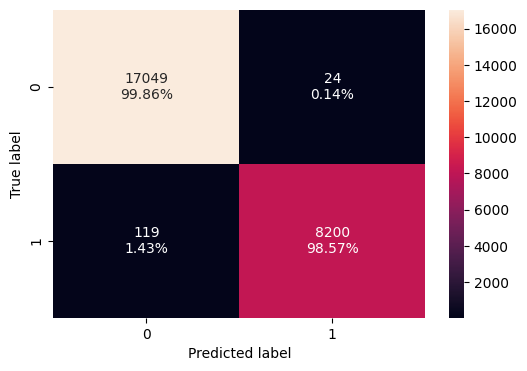

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99437 0.98570    0.99708 0.99136

####**Basic Model Performance on Test Set**

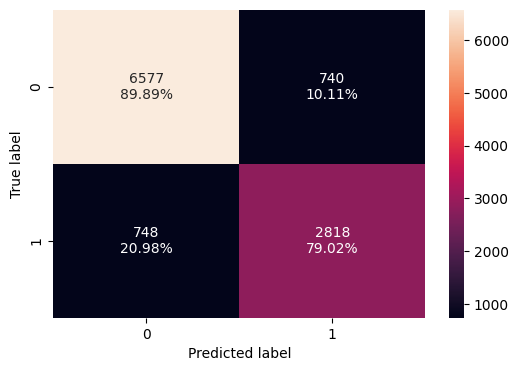

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86327 0.79024    0.79202 0.79113

- The basic model performs almost perfectly well on the training set.
- There are major discrepancies in the performance metric values across training and test sets.
- These observations are likely due to overfitting, thus we will prune the tree to get a better model.
- We can assume that this model is very complex.

####**Checking Importance Features (Default Tree)**

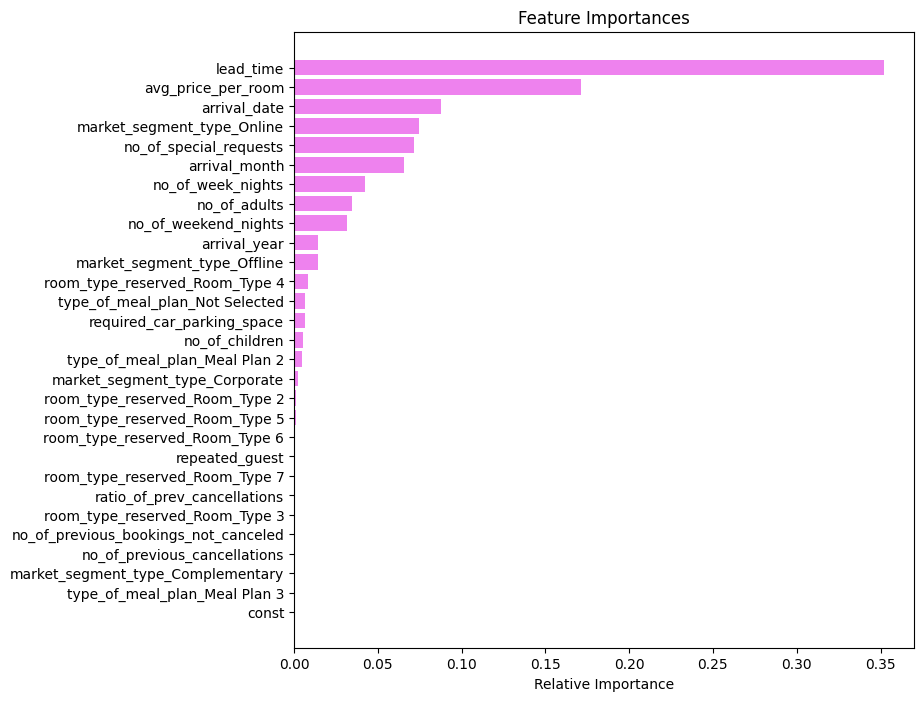

In [ ]:
#pull column names
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)



plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The 3 most important features are lead time, average price per room and arrival date respectively.

###**Pre-pruned Decision Tree**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier( random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_leaf_nodes": [50, 75, 150, 250],
    "max_depth": np.arange(2, 15, 2),
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       max_leaf_nodes=250, min_samples_split=30,
                       random_state=1)

####**Checking Performance on Training Set (Pre-pruned)**

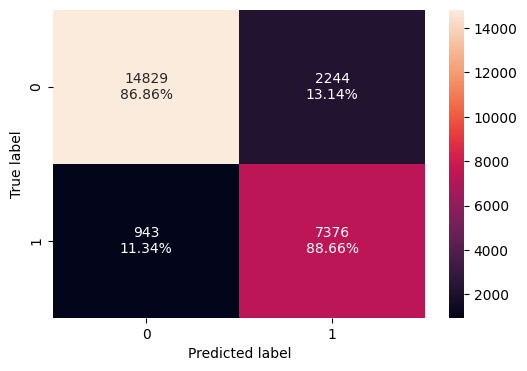

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.87449 0.88665    0.76674 0.82234

####**Checking Performance on Test Set (Pre-pruned)**

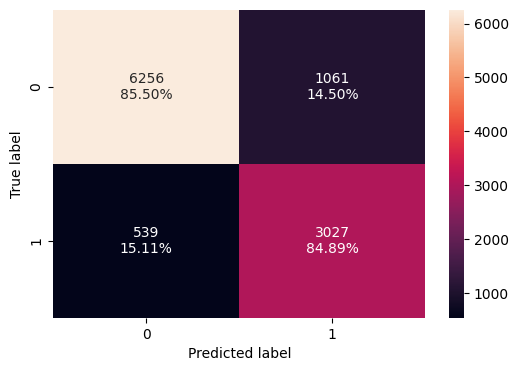

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.85298 0.84885    0.74046 0.79096

- In comparison to the performance of the default model on the test set:
  - The accuracy score decreased by 1%.
  - Recall increased by 6%.
  - Precision decreased by 5%.
  - F1 score stayed the same.
- The performance metrics for test and training sets are closer in value, indicating that there is less overfitting.

####**Checking Importance Features (Pre-pruned)**

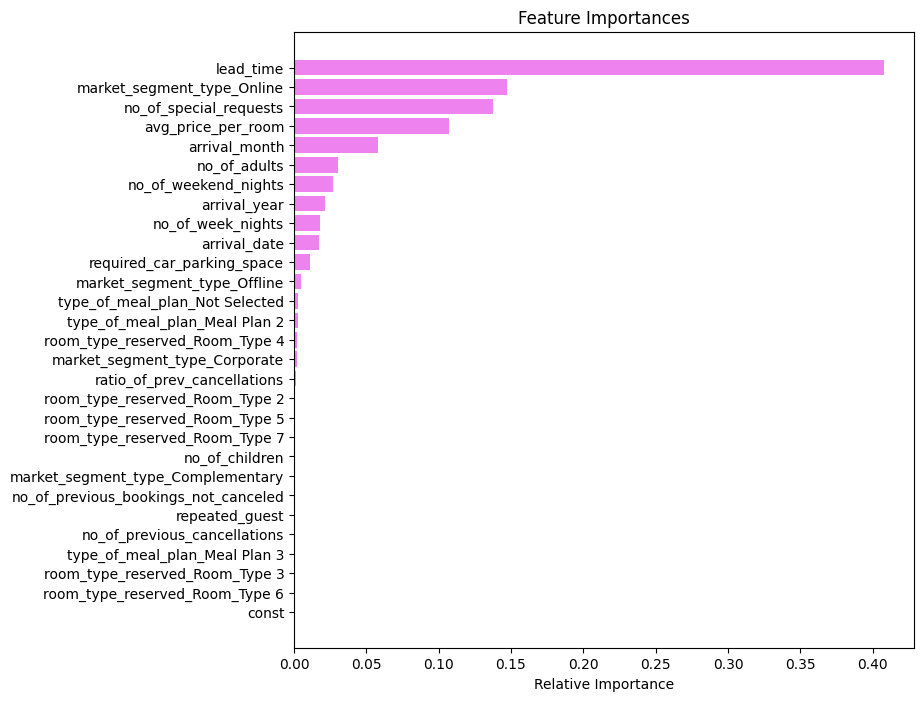

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)


# importance of features
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time is still the most important feature, followed by market_segment_type_Online and number of special requests.

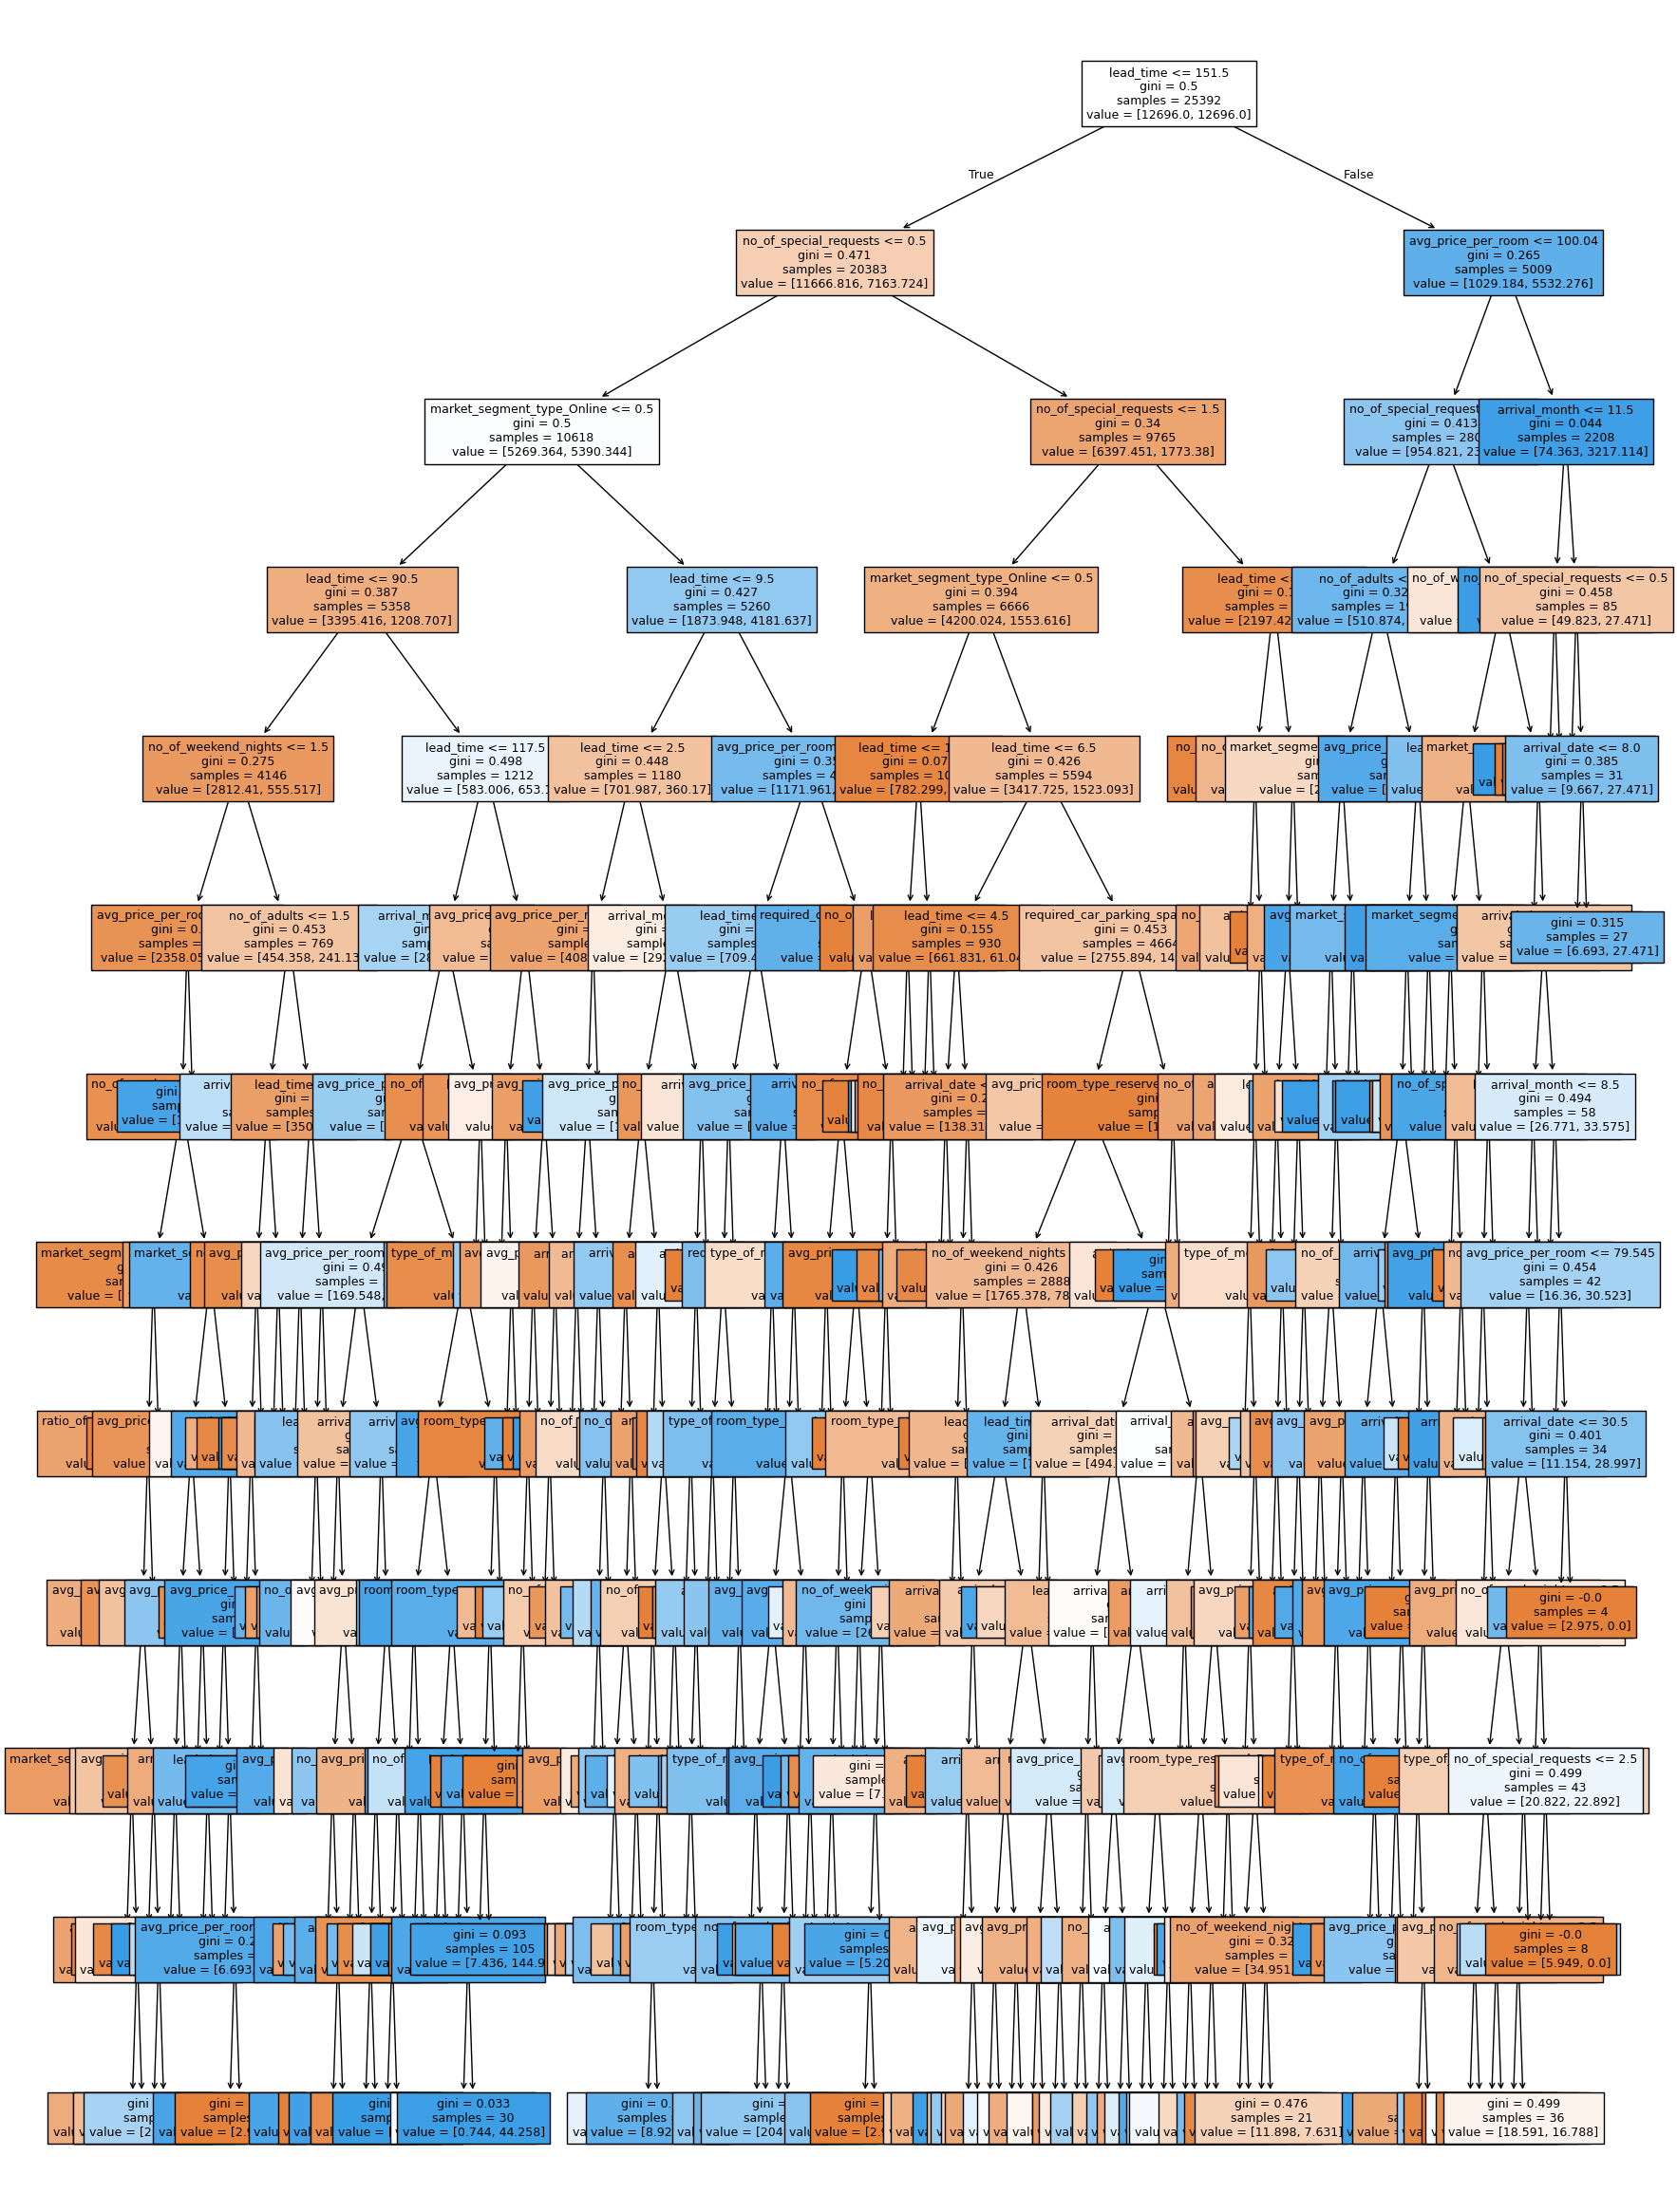

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- ratio_of_prev_cancellations <= -0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.29, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.25
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |

- The Gini values are low, indicating that the model performs just as well or no better than random guessing.

###**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00833
1       -0.00000     0.00833
2        0.00000     0.00833
3        0.00000     0.00833
4        0.00000     0.00833
...          ...         ...
1646     0.00938     0.32791
1647     0.00941     0.33732
1648     0.01253     0.34985
1649     0.03405     0.41794
1650     0.08206     0.50000

[1651 rows x 2 columns]

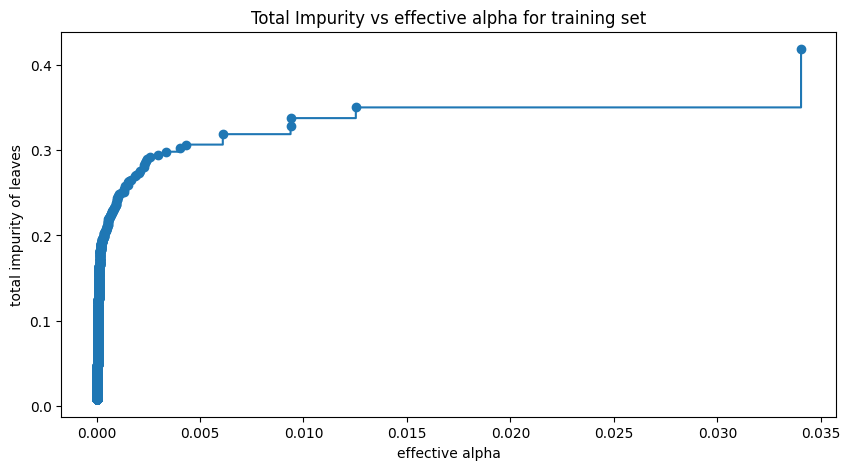

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- It is noted that there is a sharp increase in impurity as alpha increases, then it begins to stabilize.
- We will now train a decision tree using the effective alphas.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas: #go through every value in the list ccp_alphas and fit a decision tree
    ccp_alpha = max(0, ccp_alpha) #set negative ccp_alpha values to zero
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)


#print node of the last tree
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08205938055991491


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

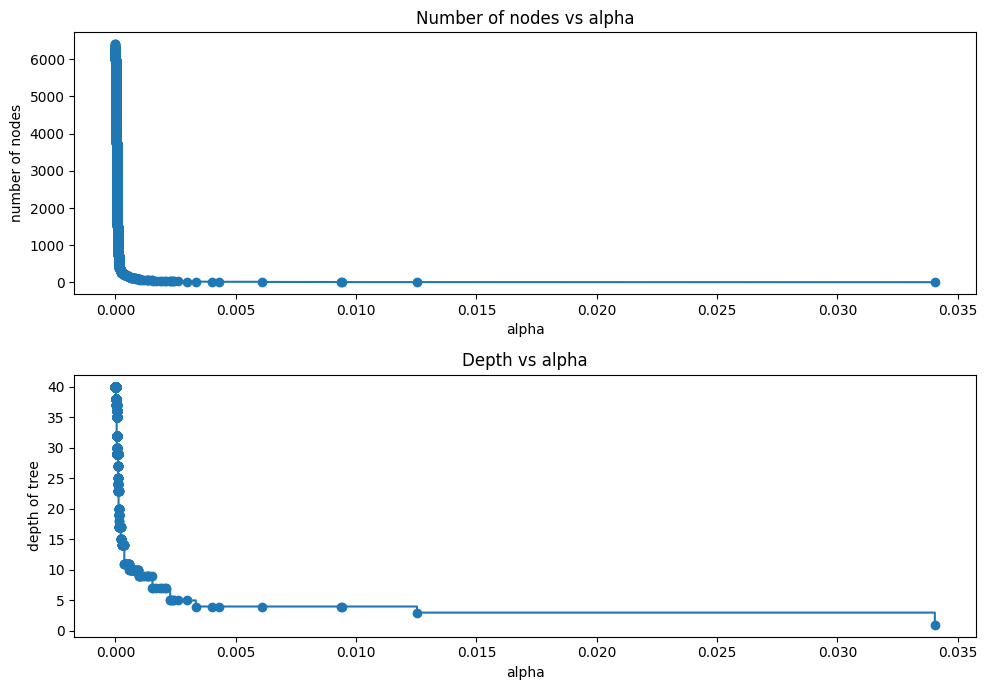

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- We can see that as alpha increases, model complexity decreases.

####**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

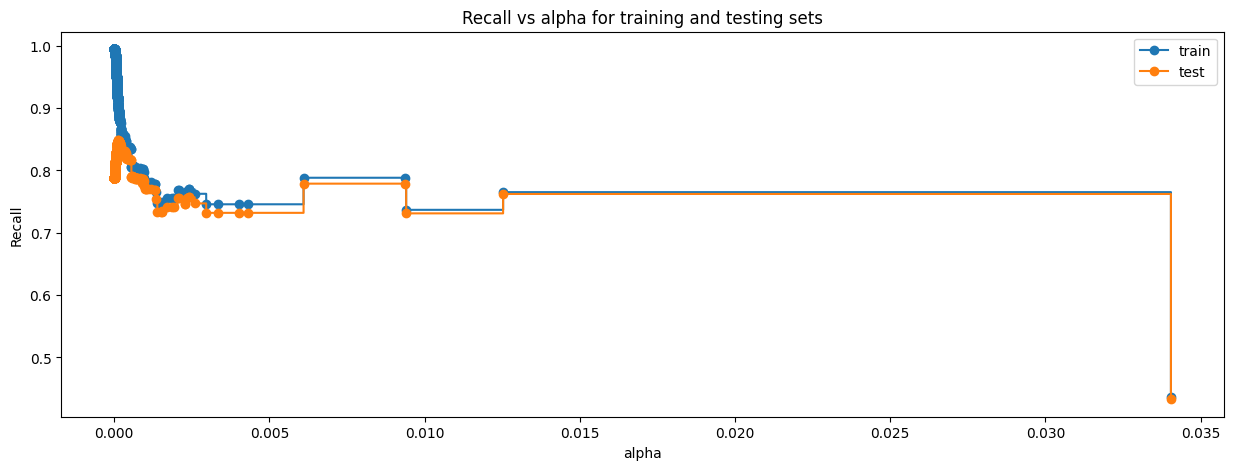

In [ ]:
#plot recall vs alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00013683395443351865,
                       class_weight='balanced', random_state=1)


####**Checking Performance on Training Set (Post-pruned)**

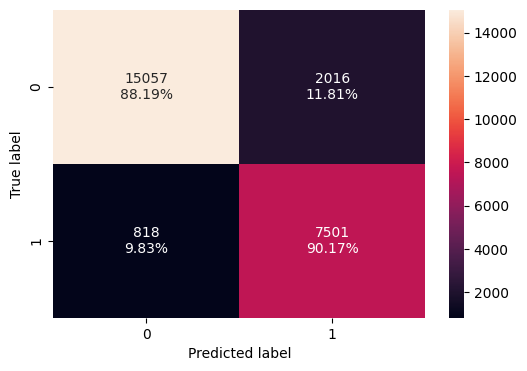

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision      F1
0   0.88839 0.90167    0.78817 0.84111

####**Checking Performance on Test Set (Post-pruned)**

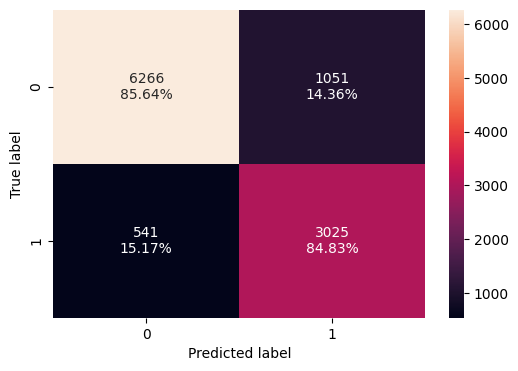

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy  Recall  Precision      F1
0   0.85372 0.84829    0.74215 0.79168

- In comparison to the performance of the pre-pruned model on the test set:
  - All metrics generally stayed the same.

####**Checking Importance Features (Post-pruned)**

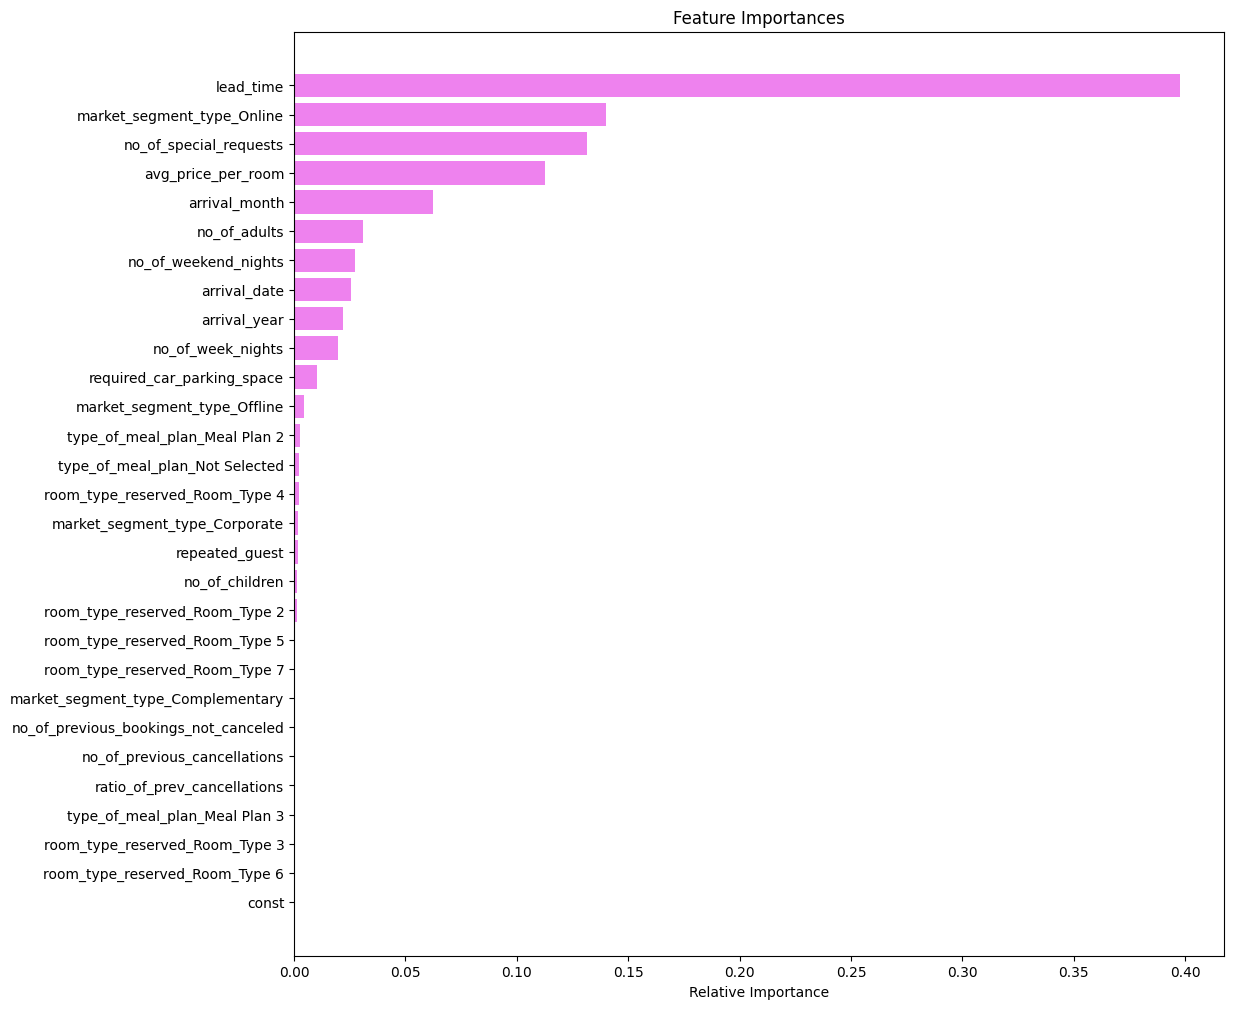

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important features are still lead time, followed by online market segment and number of special requests.

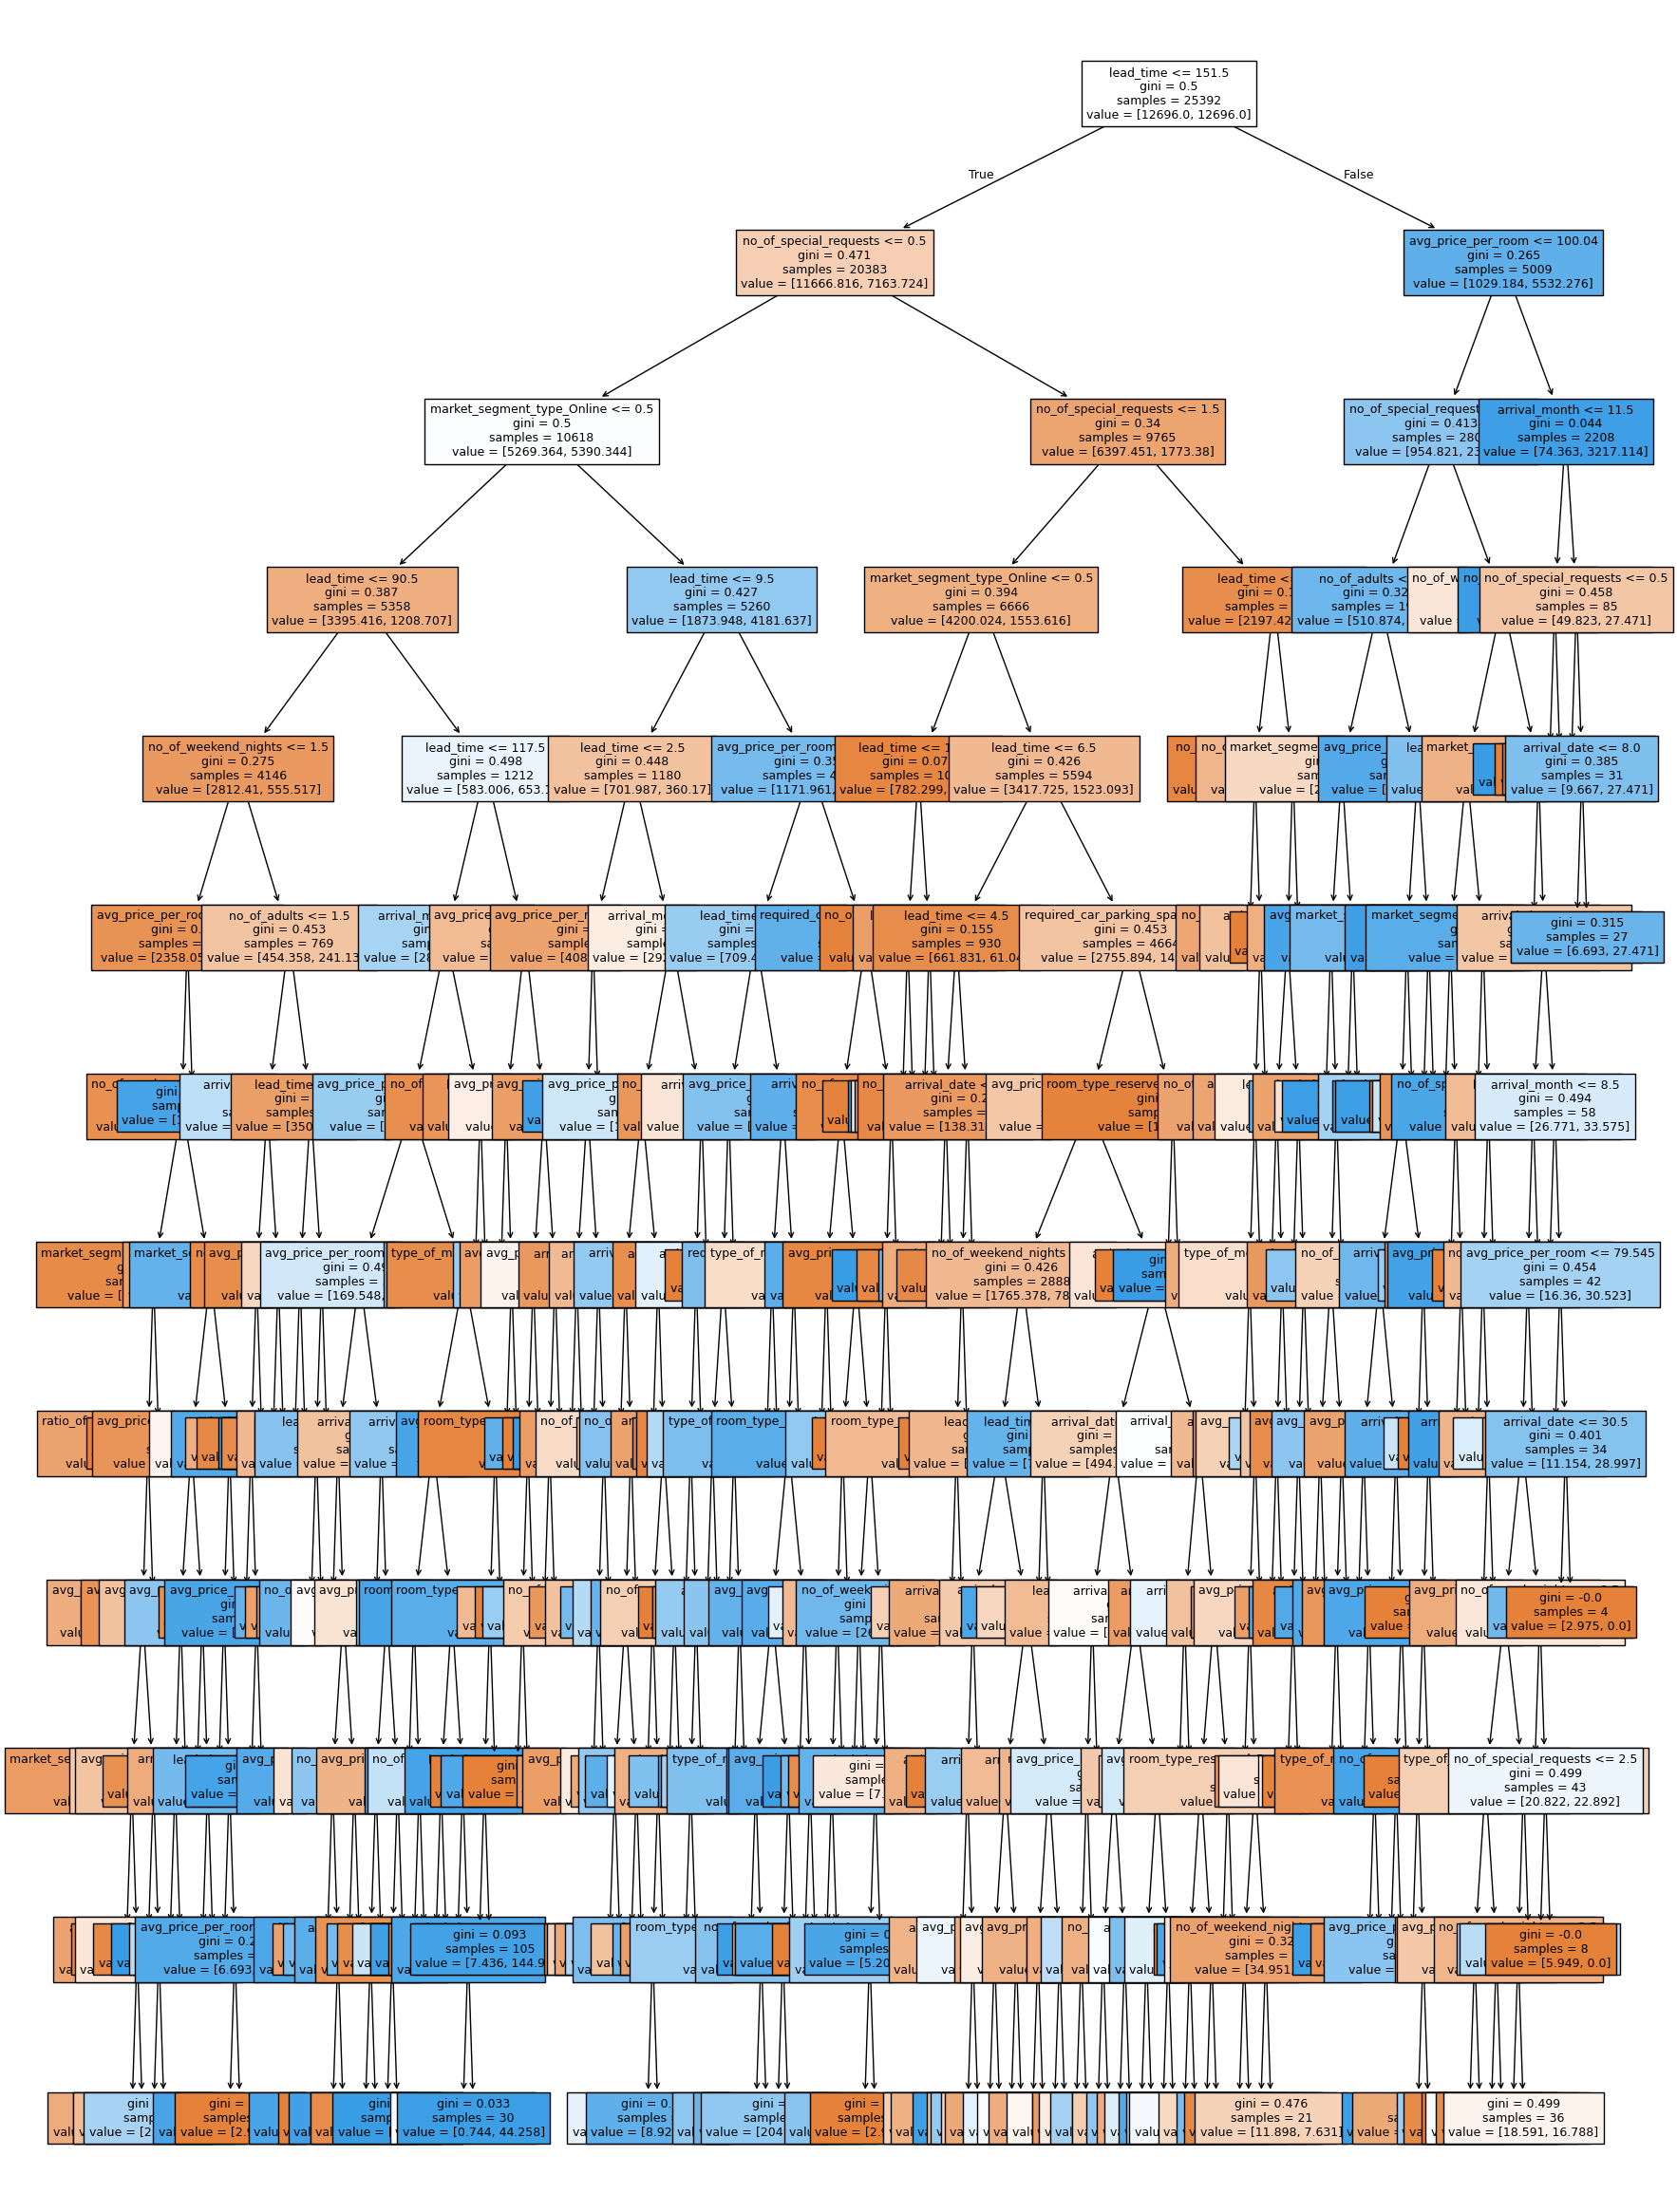

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.29, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.25
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |  

##**Decision Tree Model Comparisions**

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99437                      0.87449   
Recall                   0.98570                      0.88665   
Precision                0.99708                      0.76674   
F1                       0.99136                      0.82234   

           Decision Tree (Post-Pruning)  
Accuracy                        0.88839  
Recall                          0.90167  
Precision                       0.78817  
F1                              0.84111

In [ ]:
# test performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.86327                      0.85298   
Recall                   0.79024                      0.84885   
Precision                0.79202                      0.74046   
F1                       0.79113                      0.79096   

           Decision Tree (Post-Pruning)  
Accuracy                        0.85372  
Recall                          0.84829  
Precision                       0.74215  
F1                              0.79168

- The pre-pruned and the post-pruned trees have almost identical values for all performance metrics on the test set.
  - Both models have good recall and F1 scores on the test set.
  - Both models have slight discrepancies in performance metrics across the test and training sets, indicating acute signs of overfitting.
- The model with the smallest discrepancies across the test and training sets is the post-pruned model. Therefore, this will be our final decision tree model.

##**Performance Comparison of Models and Conclusions**

In [ ]:
#Compare top 2 models
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Threshold = 0.33','Decision Tree Model (Post-Pruned)'], 'Train_Recall':[0.77,0.90], 'Test_Recall':[0.77,0.85], 'Train_F1':[0.7,0.84], 'Test_F1':[0.69,0.79]})

#Show 2 decimal places
comparison_frame.style.format('{:.2f}', subset=['Train_Recall', 'Test_Recall', 'Train_F1', 'Test_F1'])

- We were able to generate various models that would help us predict the classification of each guest. The table above compares the top logistic regression model to the top decision tree model
- Both models have given a generalized performance on the training and test sets but the logistic, regression model shows less signs of overfitting than the decision tree model.
- In reference to recall score, the selected decision tree model can predict 85% of all cancellations, compared to the logistic regression model, which can predict 77%.
- In reference to F1 score, the decision tree model has a better balance between recall and precision than the logistic regression model.
- I recommend that the Post-Pruned Decision Tree model will be selected as the final model.

## **Actionable Insights and Recommendations**

###**Insights**

- Features associated with lower proportions of cancellations:
  - Repeated guests:
    - 98% of repeating guests did not cancel their booking, but only make up 3% of all bookings.
    - 64% of repeating guests had no previous cancellations.
    - Repeated guests tend to have lower average prices per room.
  - Reservation customizations:
    - The analysis suggested that guests who requested a parking space were less likely to cancel, compared to those who did not.
    - Similarly, as the number of special requests increased for a booking, the proportion of cancellations decreased. The number of special requests was labeled as a significant predictor in the logistic regression model (-77% change in odds) and all of the decision tree models (among top 5 importance features).
  - The data showed that higher numbers of previously uncanceled bookings were associated with lower cancellation rates.
  - December and January had the lowest proportions of cancellations out of all months. However, these months only make up 11% of the bookings. It is observed that January has the lowest average price per room and December's average price per room is moderate, in comparison to other months. Thus, pricing may be why cancellations are lower.
  - Corporate stays have the lowest average price per room (aside from the complimentary market segment) and also have the lowest proportion of cancellations against other market segments.
- Features associated with higher proportions of cancellations:
  - Longer stays:
    - Bookings that include higher numbers of weekend nights had higher proportions of cancellations (5-7 weekend nights).
    - Bookings that included more week nights tended to have higher proportions of cancellations.
  - Lead time: The analysis showed that bookings that were made over 200 days in advance were more likely to get canceled. This suggests that bookings that are made too far in advance may have a higher chance of getting canceled. Lead time was consistently labeled as the most important feature among all three decision tree models.
- Bookings for the arrival month of July had the highest cancellation rate. Bookings for this month make up about 8% of the data.
- Online bookings had the most cancellations compared to any other market segment type.

###**Recommendations**

- Due to the strong suggestion that repeating guests are less likely to cancel, it would be a great investment to make efforts in converting one-time guests to repeating guests. Offering incentives for a next visit can help, as well as launching a loyalty/rewards program. Incentives can be a percentage off of their next visit, a complimentary meal on their next visit, points offered through a rewards system, etc.
- Low average prices per room seem to be a common theme among low cancellation rates. Offering competitive prices can aid in attracting loyal customers.
- The hotel can have promotions during their slow months, such as December and January, to increase business. The promotions can be similar to those suggested in the previous bullets.
- A higher number of special requests is associated with lower proportions of cancellations. When high numbers of special requests are observed, use it as an opportunity to upsale by offering add ons to the reservation.
- The hotel can use a system that flags reservations that have characteristics associated with high cancellation rates. If a reservation is flagged, a non-refundable deposit or a credit card on file can be required in order to proceed with the booking. Alternatively, the hotel can make this a requirement for all bookings in order to reduce the loss of revenue caused by cancellations.
- Consider the lead time of a reservation. Take caution when reservations are made very far in advance, specifically at 200 or more days in advance, since these values are associated with high cancellation rates.
- Require credit cards on file or non-refundable deposits in the month of July, since it is the month with the highest cancellation rate.
- The benefit of the online market segment having the highest cancellation rate is that these reservations can be analyzed via website. A high quality website can screen reservations and thus, help the hotel predict the likelihood of cancellation for intervention purposes.